In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import missingno as msno
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the data

In [ ]:
kickstarter_df_with_features = pd.read_csv('kickstarter_data_with_features.csv', index_col = 0)
# kickstarter_df_with_features= pd.read_csv('/content/drive/MyDrive/Kickstarted/kickstarter_data_with_features.csv', index_col = 0)

print("Kickstarter Dataset (without features) First 5 Rows")
kickstarter_df_with_features.head()

<ipython-input-3-06c4fab2690a>:4: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_df_with_features= pd.read_csv('/content/drive/MyDrive/Kickstarted/kickstarter_data_with_features.csv', index_col = 0)


Kickstarter Dataset (without features) First 5 Rows


,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,creator,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,$,True,2015-01-23 10:35:00,2015-01-23 10:35:00,2014-11-29 22:55:57,2014-12-17 13:47:36,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,11.0,9.0,21.0,16.0,Friday,Friday,Saturday,Wednesday,1,23,2015,10,1,23,2015,10,11,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,NaN
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,USD,$,True,2015-05-01 16:13:22,2015-05-01 16:13:24,2015-02-20 09:28:43,2015-03-02 16:13:22,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,4.0,4.0,23.0,15.0,Friday,Friday,Friday,Monday,5,1,2015,16,5,1,2015,16,2,20,2015,9,3,2,2015,16,10 days 06:44:39.000000000,60 days 00:00:00.000000000,NaN
2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,USD,$,True,2015-03-26 08:17:04,2015-03-26 08:17:05,2015-01-24 00:08:06,2015-01-25 08:17:04,False,5,1.000000,120.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""NG"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,8.0,8.0,18.0,10.0,Thursday,Thursday,Saturday,Sunday,3,26,2015,8,3,26,2015,8,1,24,2015,0,1,25,2015,8,1 days 08:08:58.000000000,60 days 00:00:00.000000000,NaN
3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,USD,$,True,2014-10-06 00:41:17,2014-10-06 00:41:17,2014-09-05 22:30:00,2014-09-06 00:41:17,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,7.0,6.0,21.0,13.0,Monday,Monday,Friday,Saturday,10,6,2014,0,10,6,2014,0,9,5,2014,22,9,

In [ ]:
kickstarter_df= pd.read_csv('kickstarter_data_full.csv', index_col = 0)
# kickstarter_df = pd.read_csv('/content/drive/MyDrive/Kickstarted/kickstarter_data_full.csv', index_col = 0)
# print("Kickstarter Dataset First 5 Rows")
kickstarter_df.head()

<ipython-input-4-e1a00b28118d>:3: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_df = pd.read_csv('/content/drive/MyDrive/Kickstarted/kickstarter_data_full.csv', index_col = 0)


,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,creator,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,$,True,2015-01-23 10:35:00,2015-01-23 10:35:00,2014-11-29 22:55:57,2014-12-17 13:47:36,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,11.0,9.0,21.0,16.0,Friday,Friday,Saturday,Wednesday,1,23,2015,10,1,23,2015,10,11,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,USD,$,True,2015-05-01 16:13:22,2015-05-01 16:13:24,2015-02-20 09:28:43,2015-03-02 16:13:22,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,4.0,4.0,23.0,15.0,Friday,Friday,Friday,Monday,5,1,2015,16,5,1,2015,16,2,20,2015,9,3,2,2015,16,10 days 06:44:39.000000000,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,USD,$,True,2015-03-26 08:17:04,2015-03-26 08:17:05,2015-01-24 00:08:06,2015-01-25 08:17:04,False,5,1.000000,120.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""NG"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,8.0,8.0,18.0,10.0,Thursday,Thursday,Saturday,Sunday,3,26,2015,8,3,26,2015,8,1,24,2015,0,1,25,2015,8,1 days 08:08:58.000000000,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,USD,$,True,2014-10-06 00:41:17,2014-10-06 00:41:17,2014-09-05 22:30:00,2014-09-06 00:41:17,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""ba

In [ ]:
kickstarter_df.describe()

,id,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
count,2.063200e+04,2.063200e+04,2.063200e+04,20632.000000,20632.000000,2.063200e+04,20627.000000,20627.000000,20627.000000,20627.000000,20632.000000,20632.000000,20632.00000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000
mean,1.071156e+09,9.410497e+04,2.139268e+04,183.675843,1.039363,2.091591e+04,5.940806,5.292578,18.991177,13.081204,6.707784,15.695134,2014.83259,12.926473,6.685149,15.654808,2014.824932,12.855855,6.473633,15.542652,2014.620105,12.673371,6.541828,15.322363,2014.752084,12.417168,49.577598,34.716896,31.169397,0.291683,0.806466,0.816208,0.225136,0.292022
std,6.154929e+08,1.335511e+06,1.204973e+05,1222.012658,0.230419,1.154717e+05,2.826118,2.418168,4.632371,3.283547,3.411420,9.027917,1.27042,6.037133,3.448245,9.004697,1.267553,6.023725,3.345992,8.776659,1.273937,5.947005,3.379879,8.800871,1.261752,5.574409,111.094601,11.873143,14.279705,0.454548,0.395078,0.387324,0.417682,0.454703
min,1.645550e+05,1.000000e+00,0.000000e+00,0.000000,0.045641,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2009.00000,0.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.472185e+08,4.000000e+03,2.500000e+01,2.000000,1.000000,2.500000e+01,4.000000,3.000000,17.000000,11.000000,4.000000,8.000000,2014.00000,9.000000,4.000000,8.000000,2014.000000,9.000000,4.000000,8.000000,2014.000000,9.000000,4.000000,8.000000,2014.000000,9.000000,3.000000,30.000000,28.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.069882e+09,1.400000e+04,6.950000e+02,12.000000,1.000000,7.163012e+02,6.000000,5.000000,20.000000,13.000000,7.000000,15.000000,2015.00000,13.000000,7.000000,15.000000,2015.000000,13.000000,7.000000,15.000000,2015.000000,13.000000,7.000000,15.000000,2015.000000,12.000000,14.000000,30.000000,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.601801e+09,5.000000e+04,5.954250e+03,63.000000,1.000000,6.004628e+03,8.000000,7.000000,22.000000,15.000000,10.000000,23.000000,2016.00000,17.000000,10.000000,23.000000,2016.000000,17.000000,9.000000,23.000000,2016.000000,17.000000,9.000000,23.000000,2016.000000,16.000000,45.000000,40.000000,35.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2.147388e+09,1.000000e+08,6.225355e+06,105857.000000,1.715913,6.225355e+06,16.000000,14.000000,35.000000,30.000000,12.000000,31.000000,2017.00000,23.000000,12.000000,31.000000,2017.000000,23.000000,12.000000,31.000000,2017.000000,23.000000,12.000000,31.000000,2017.000000,23.000000,1754.000000,91.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print("Datatype of Columns")
kickstarter_df.info()

Datatype of Columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20631
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           20632 non-null  int64  
 1   photo                        20632 non-null  object 
 2   name                         20632 non-null  object 
 3   blurb                        20627 non-null  object 
 4   goal                         20632 non-null  float64
 5   pledged                      20632 non-null  float64
 6   state                        20632 non-null  object 
 7   slug                         20632 non-null  object 
 8   disable_communication        20632 non-null  bool   
 9   country                      20632 non-null  object 
 10  currency                     20632 non-null  object 
 11  currency_symbol              20632 non-null  object 
 12  currency_trailing_code       20632 non-null  bool   
 

In [ ]:
print("Data Columns\n")
kickstarter_df.columns

Data Columns



Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug', 'disable_communication', 'country', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate', 'usd_pledged', 'creator', 'location', 'category', 'profile', 'spotlight', 'urls', 'source_url', 'friends', 'is_starred', 'is_backing', 'permissions', 'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'create_to_launch', 'launch_to_deadline', 'launch_to_state_change', 'create_to_launch_days',
       'launch_

In [ ]:
print("Data Shape\n")
kickstarter_df.shape

Data Shape



(20632, 67)

In [ ]:
print("Null values in the data\n")
kickstarter_df.isnull().values.any()

Null values in the data



True

In [ ]:

print("Sum of null values")
kickstarter_df.isnull().sum()

Sum of null values


id                                 0
photo                              0
name                               0
blurb                              5
goal                               0
pledged                            0
state                              0
slug                               0
disable_communication              0
country                            0
currency                           0
currency_symbol                    0
currency_trailing_code             0
deadline                           0
state_changed_at                   0
created_at                         0
launched_at                        0
staff_pick                         0
backers_count                      0
static_usd_rate                    0
usd_pledged                        0
creator                            0
location                          45
category                        1889
profile                            0
spotlight                          0
urls                               0
s

In [ ]:
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## EDA


<Axes: >

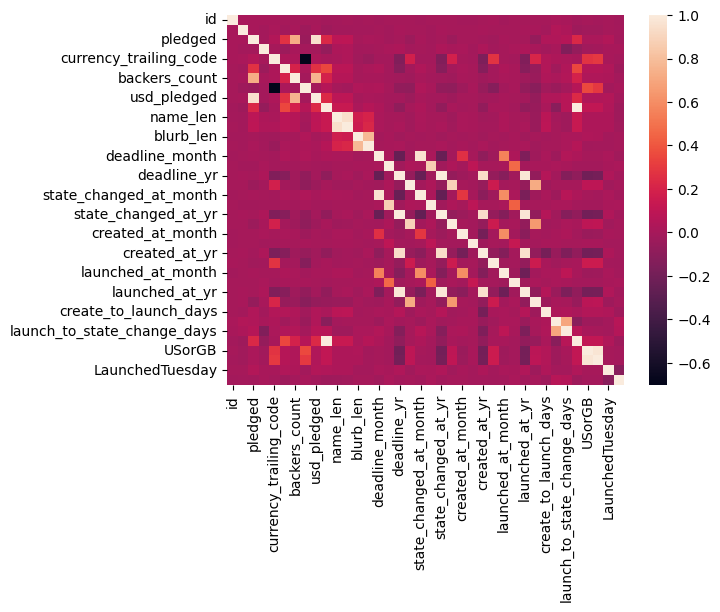

In [ ]:
# # Drop missing values
# kickstarter_df = kickstarter_df.dropna()
# kickstarter_df.isnull().sum()
corr_matrix = kickstarter_df.corr()
sns.heatmap(corr_matrix)

In [ ]:
duplicates = kickstarter_df.duplicated()
print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  0


Distribution of the Attributes


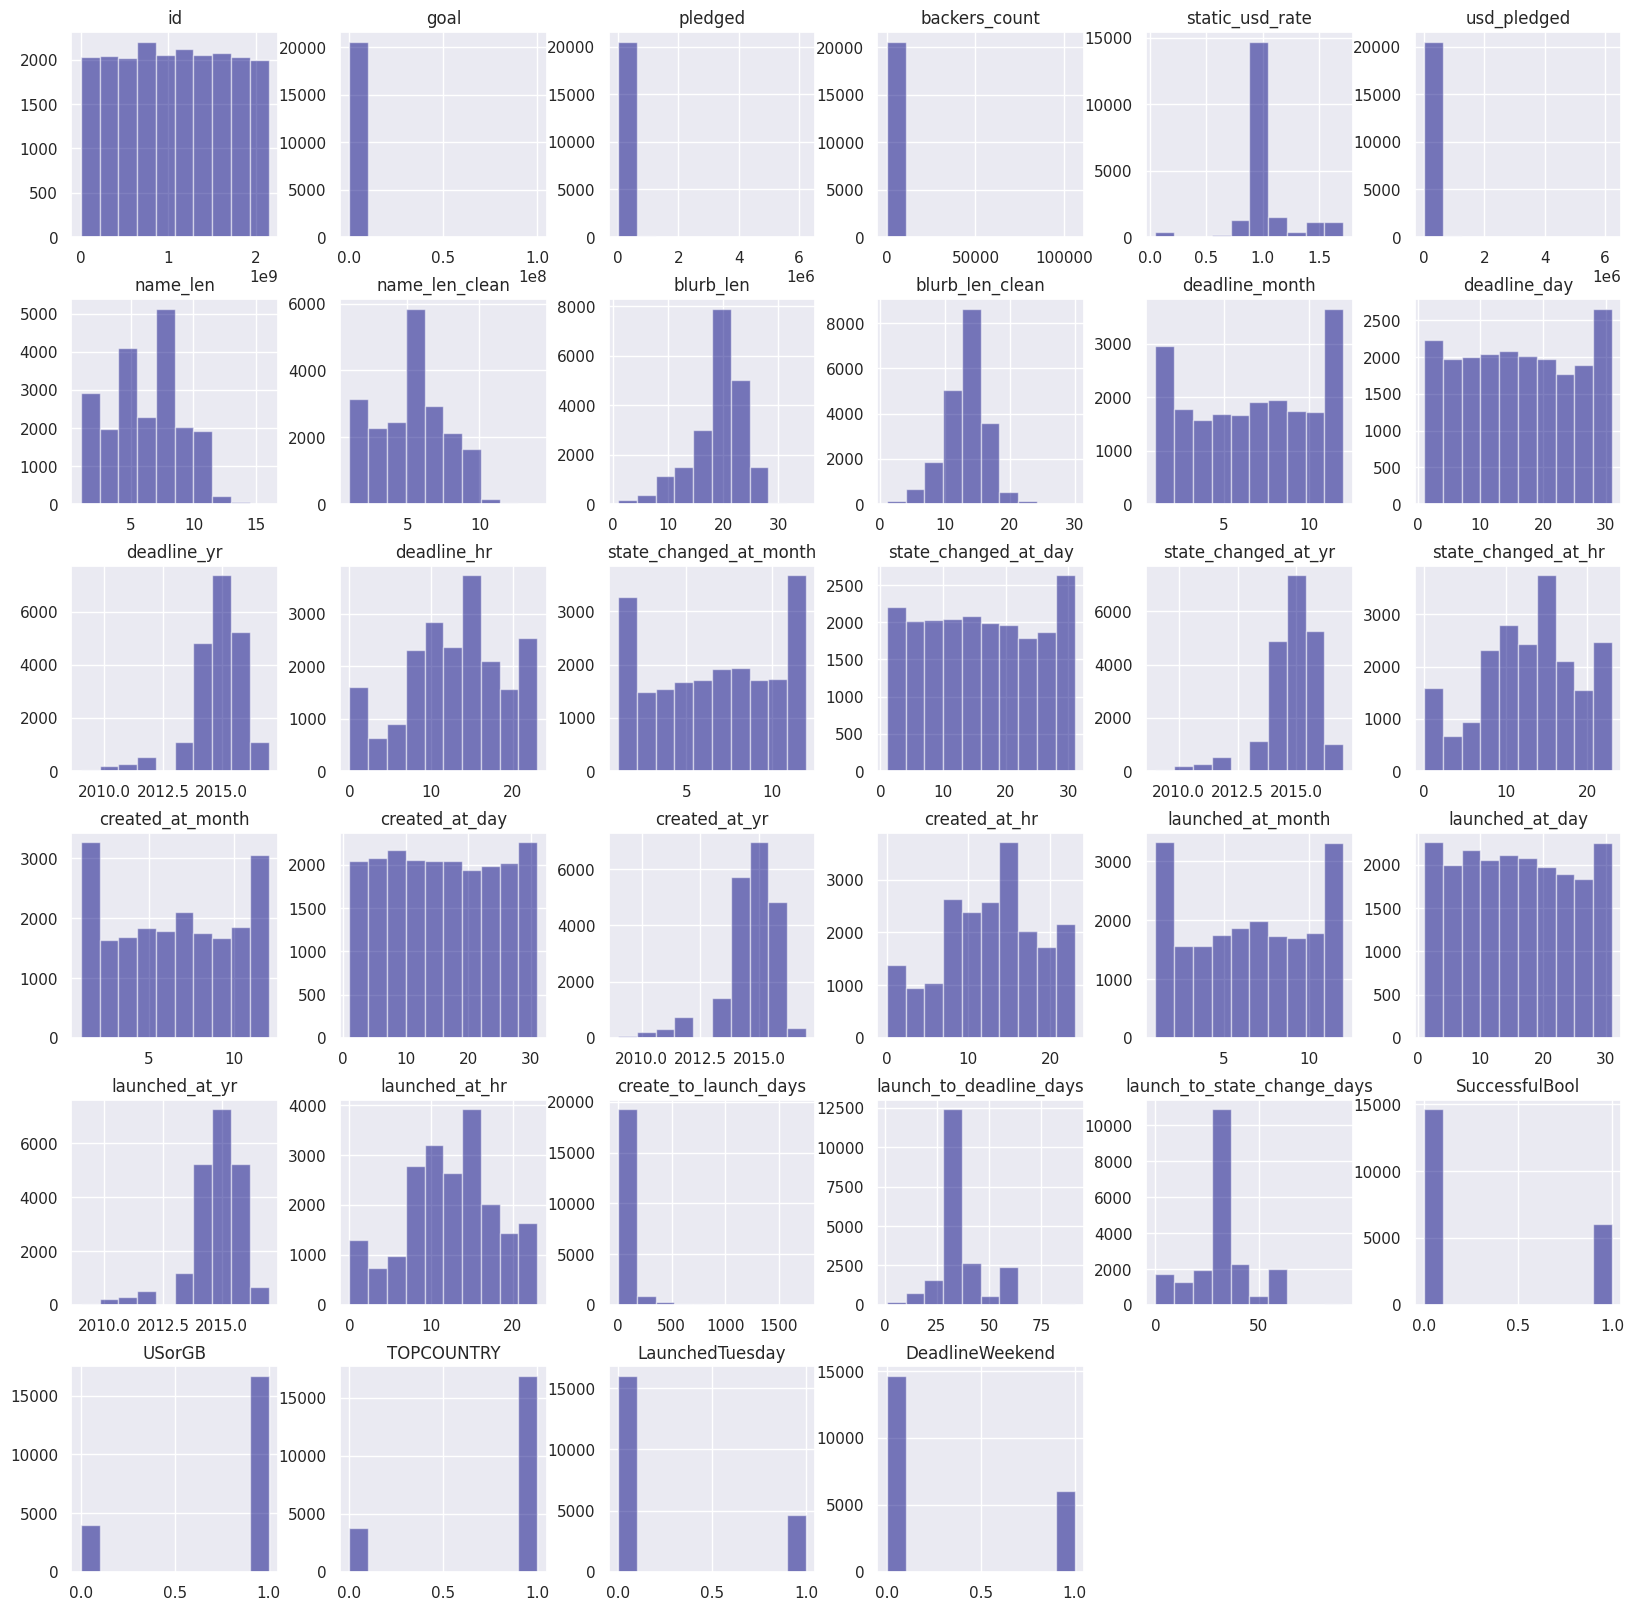

In [ ]:
print("Distribution of the Attributes")
sns.set(style="darkgrid")
kickstarter_df.hist(bins=10,figsize=(20,20) ,color = 'navy', alpha = 0.5)
plt.show()

In [ ]:
# column_list = list(kickstarter_df.columns)
# # column_list

<Axes: title={'center': 'Distribution of Campaigns over Weekdays'}>

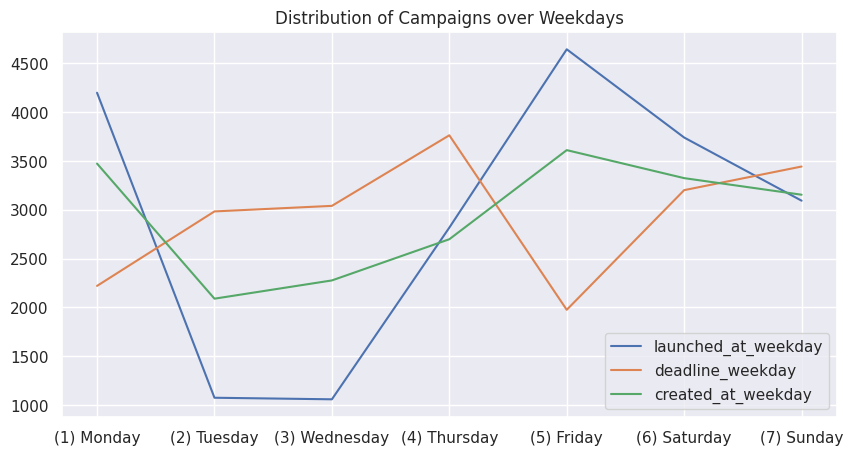

In [ ]:
plot_df = pd.concat([kickstarter_df['launched_at_weekday'].value_counts(),
                     kickstarter_df['deadline_weekday'].value_counts(),
                    kickstarter_df['created_at_weekday'].value_counts()], axis=1)
plot_df.index = ["(5) Friday","(1) Monday","(6) Saturday","(7) Sunday","(4) Thursday","(2) Tuesday","(3) Wednesday"]
plot_df = plot_df.sort_index()
plot_df.plot(kind='line', figsize=(10,5), title = "Distribution of Campaigns over Weekdays")

<Axes: title={'center': 'Distribution of Campaigns over UTC Day by hour'}>

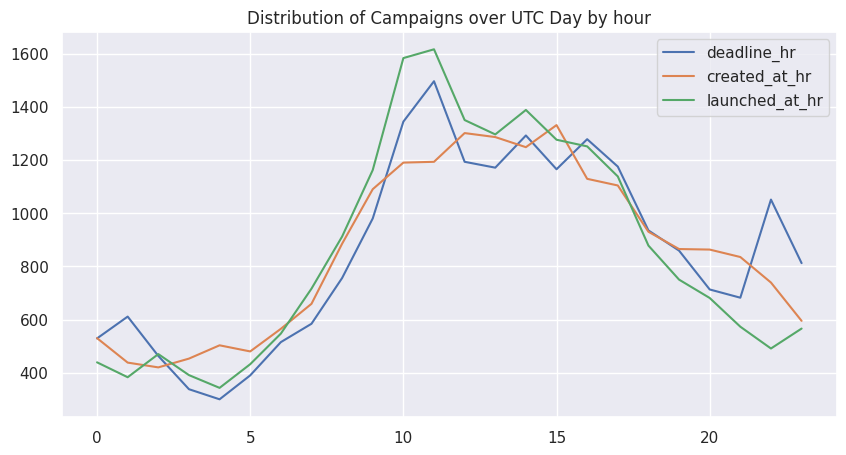

In [ ]:
plot_df = pd.concat([kickstarter_df['deadline_hr'].value_counts(),
                     kickstarter_df['created_at_hr'].value_counts(),
                    kickstarter_df['launched_at_hr'].value_counts()], axis=1)
plot_df = plot_df.sort_index()
plot_df.plot(kind='line', figsize=(10,5), title = "Distribution of Campaigns over UTC Day by hour")

<Axes: title={'center': 'State Distribution'}>

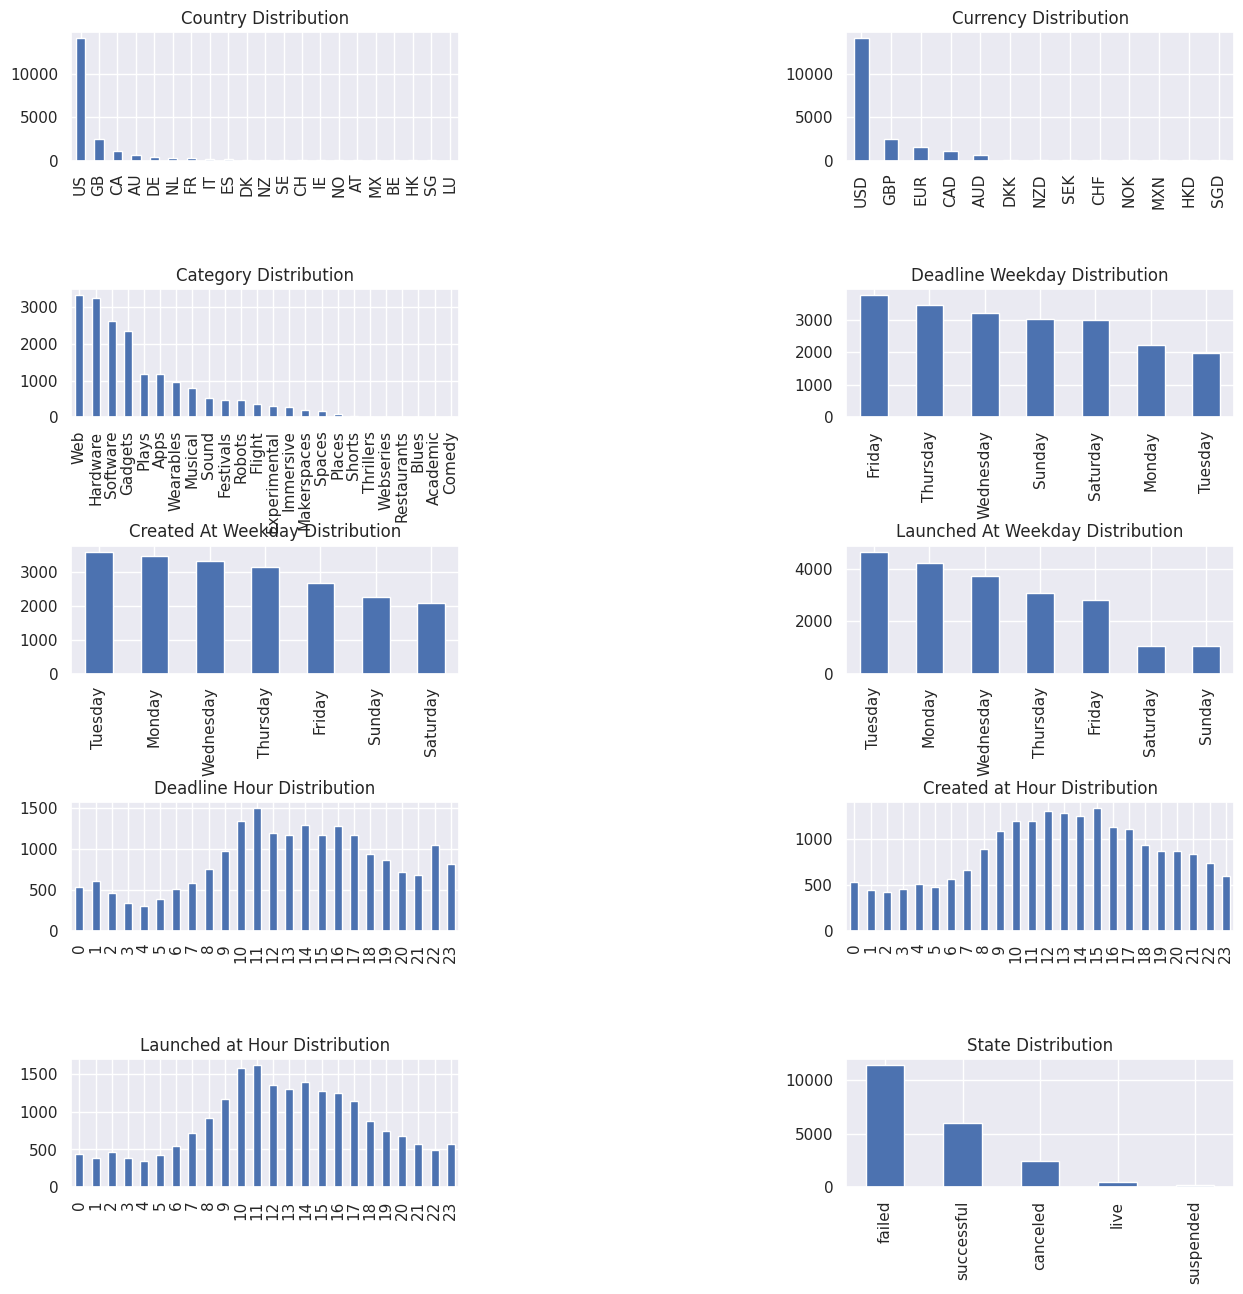

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2)
fig.subplots_adjust(hspace=1, wspace = 1)

kickstarter_df['country'].value_counts().plot(kind = 'bar',ax=axes[0,0], title = 'Country Distribution', figsize=(15,15))
kickstarter_df['currency'].value_counts().plot(kind = 'bar',ax=axes[0,1], title = 'Currency Distribution', figsize=(15,15))
kickstarter_df['category'].value_counts().plot(kind = 'bar',ax=axes[1,0], title = 'Category Distribution', figsize=(15,15))
kickstarter_df['deadline_weekday'].value_counts().plot(kind = 'bar',ax=axes[1,1], title = 'Deadline Weekday Distribution', figsize=(15,15))
kickstarter_df['created_at_weekday'].value_counts().plot(kind = 'bar',ax=axes[2,0], title = 'Created At Weekday Distribution', figsize=(15,15))
kickstarter_df['launched_at_weekday'].value_counts().plot(kind = 'bar',ax=axes[2,1], title = 'Launched At Weekday Distribution', figsize=(15,15))
kickstarter_df['deadline_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[3,0], title = 'Deadline Hour Distribution', figsize=(15,15))
kickstarter_df['created_at_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[3,1], title = 'Created at Hour Distribution', figsize=(15,15))
kickstarter_df['launched_at_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[4,0], title = 'Launched at Hour Distribution', figsize=(15,15))
kickstarter_df['state'].value_counts().plot(kind = 'bar',ax=axes[4,1], title = 'State Distribution', figsize=(15,15))

In [ ]:
# Group the data by country and state
grouped = kickstarter_df.groupby(['country', 'state'])

# Calculate the count and percentage of projects in each state
results = grouped.size().unstack().fillna(0)
results['Total'] = results.sum(axis=1)
results['Success Rate'] = results['successful'] / results['Total']
results['Failure Rate'] = results['failed'] / results['Total']
results['Live Rate'] = results['live'] / results['Total']
results['Cancelled Rate'] = results['canceled'] / results['Total']
results['Suspended Rate'] = results['suspended'] / results['Total']

# Print the results
results[['Total', 'Success Rate', 'Failure Rate', 'Live Rate', 'Cancelled Rate', 'Suspended Rate']]

state,Total,Success Rate,Failure Rate,Live Rate,Cancelled Rate,Suspended Rate
country,,,,,,
AT,63.0,0.142857,0.666667,0.079365,0.111111,0.000000
AU,674.0,0.163205,0.645401,0.031157,0.132047,0.028190
BE,51.0,0.078431,0.725490,0.039216,0.117647,0.039216
CA,1098.0,0.214026,0.612022,0.027322,0.131148,0.015483
CH,94.0,0.212766,0.585106,0.063830,0.127660,0.010638
DE,377.0,0.233422,0.591512,0.063660,0.103448,0.007958
DK,123.0,0.162602,0.658537,0.032520,0.146341,0.000000
ES,168.0,0.125000,0.744048,0.035714,0.077381,0.017857
FR,312.0,0.201923,0.580128,0.048077,0.163462,0.006410


In [ ]:
# Filter the dataset to include only failed projects
failed_projects = kickstarter_df[kickstarter_df['state'] == 'failed']

# Group the data by deadline weekday and month, and calculate the average launch to failed state days
avg_days = failed_projects.groupby(['deadline_weekday', 'deadline_month'])['launch_to_state_change_days'].mean()

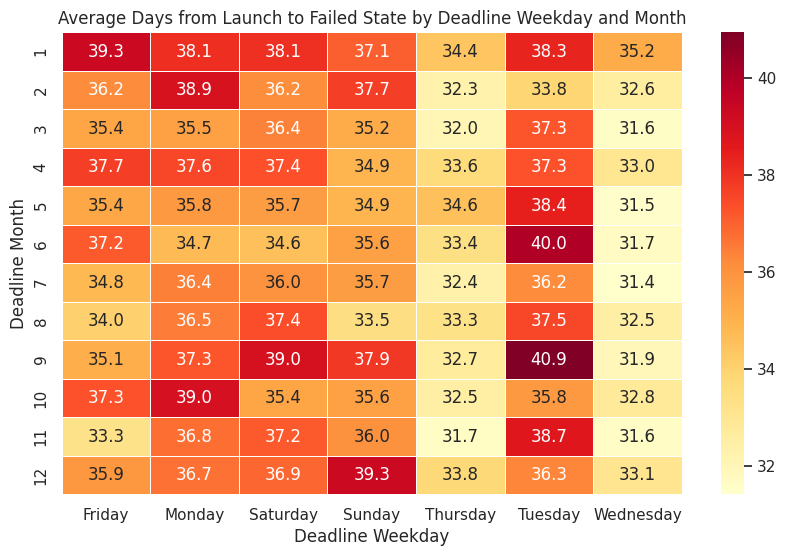

In [ ]:
# Reshape the data into a pivot table for plotting
avg_days = avg_days.reset_index()
pivot = avg_days.pivot(index='deadline_month', columns='deadline_weekday', values='launch_to_state_change_days')

# Create the plot
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.1f', linewidths=.5, ax=ax)
ax.set_title('Average Days from Launch to Failed State by Deadline Weekday and Month')
ax.set_xlabel('Deadline Weekday')
ax.set_ylabel('Deadline Month')
plt.show()

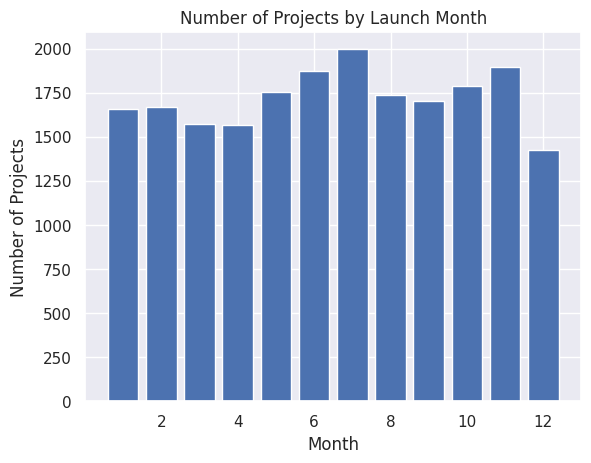

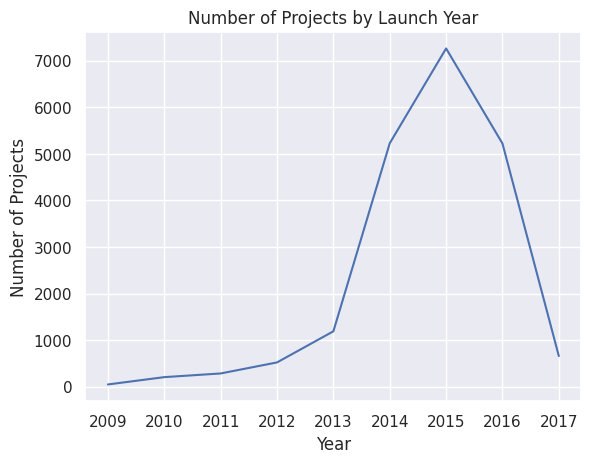

In [ ]:
# Convert the "launched_at" column to a pandas datetime object
kickstarter_df["launched_at"] = pd.to_datetime(kickstarter_df["launched_at"])

# Create new columns for the month and year of the launch
kickstarter_df["launch_month"] = kickstarter_df["launched_at"].dt.month
kickstarter_df["launch_year"] = kickstarter_df["launched_at"].dt.year

# Group the data by launch month and count the number of projects in each month
projects_by_month = kickstarter_df.groupby("launch_month")["id"].count()

# Group the data by launch year and count the number of projects in each year
projects_by_year = kickstarter_df.groupby("launch_year")["id"].count()

# Create a bar chart for the number of projects by launch month
plt.bar(projects_by_month.index, projects_by_month.values)
plt.title('Number of Projects by Launch Month')
plt.xlabel('Month')
plt.ylabel('Number of Projects')
plt.show()

# Create a line chart for the number of projects by launch year
plt.plot(projects_by_year.index, projects_by_year.values)
plt.title('Number of Projects by Launch Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by state and launched month and year
state_month_year = kickstarter_df.groupby(['state', 'launched_at_month', 'launched_at_yr']).agg({'id': 'count'}).reset_index()

# Separate the data by state
successful = state_month_year[state_month_year['state'] == 'successful']
failed = state_month_year[state_month_year['state'] == 'failed']
live = state_month_year[state_month_year['state'] == 'live']
cancelled = state_month_year[state_month_year['state'] == 'cancelled']
suspended = state_month_year[state_month_year['state'] == 'suspended']

# Count the number of projects in each state for each month and year
successful_counts = successful.pivot(index='launched_at_month', columns='launched_at_yr', values='id')
failed_counts = failed.pivot(index='launched_at_month', columns='launched_at_yr', values='id')
live_counts = live.pivot(index='launched_at_month', columns='launched_at_yr', values='id')
cancelled_counts = cancelled.pivot(index='launched_at_month', columns='launched_at_yr', values='id')
suspended_counts = suspended.pivot(index='launched_at_month', columns='launched_at_yr', values='id')

# Display results
print("Successful projects:")
display(successful_counts)
print("\nFailed projects:")
display(failed_counts)
print("\nLive projects:")
display(live_counts)
print("\nCancelled projects:")
display(cancelled_counts)
print("\nSuspended projects:")
display(suspended_counts)


Successful projects:


launched_at_yr,2009,2010,2011,2012,2013,2014,2015,2016,2017
launched_at_month,,,,,,,,,
1,NaN,1.0,12.0,14.0,37.0,43.0,141.0,122.0,43.0
2,NaN,2.0,7.0,12.0,37.0,45.0,173.0,132.0,1.0
3,NaN,8.0,12.0,25.0,47.0,44.0,187.0,156.0,NaN
4,2.0,2.0,9.0,15.0,47.0,82.0,184.0,130.0,NaN
5,1.0,2.0,13.0,27.0,44.0,138.0,224.0,164.0,NaN
6,NaN,6.0,11.0,24.0,33.0,162.0,205.0,154.0,NaN
7,2.0,6.0,6.0,21.0,45.0,166.0,174.0,133.0,NaN
8,NaN,6.0,16.0,21.0,45.0,180.0,122.0,119.0,NaN
9,4.0,8.0,10.0,25.0,40.0,129.0,170.0,114.0,NaN



Failed projects:


launched_at_yr,2009,2010,2011,2012,2013,2014,2015,2016,2017
launched_at_month,,,,,,,,,
1,NaN,6.0,13.0,18.0,29.0,49.0,347.0,237.0,79.0
2,NaN,4.0,7.0,8.0,36.0,52.0,436.0,297.0,NaN
3,NaN,1.0,5.0,13.0,47.0,78.0,446.0,296.0,NaN
4,NaN,6.0,9.0,18.0,51.0,116.0,440.0,251.0,NaN
5,3.0,10.0,17.0,24.0,57.0,167.0,380.0,249.0,NaN
6,2.0,15.0,10.0,15.0,53.0,259.0,394.0,288.0,NaN
7,2.0,12.0,9.0,16.0,47.0,552.0,331.0,218.0,NaN
8,NaN,10.0,9.0,21.0,39.0,430.0,315.0,192.0,NaN
9,10.0,8.0,12.0,24.0,40.0,359.0,319.0,207.0,NaN



Live projects:


launched_at_yr,2016,2017
launched_at_month,,
1,NaN,274.0
2,NaN,214.0
12,20.0,NaN



Cancelled projects:


launched_at_yr
launched_at_month



Suspended projects:


launched_at_yr,2011,2012,2013,2014,2015,2016,2017
launched_at_month,,,,,,,
1,NaN,NaN,NaN,NaN,12.0,10.0,5.0
2,NaN,NaN,1.0,NaN,9.0,5.0,NaN
3,1.0,NaN,NaN,NaN,10.0,4.0,NaN
4,NaN,NaN,NaN,1.0,13.0,4.0,NaN
5,NaN,NaN,NaN,NaN,7.0,5.0,NaN
6,NaN,1.0,1.0,2.0,17.0,7.0,NaN
7,NaN,1.0,NaN,6.0,11.0,3.0,NaN
8,NaN,NaN,NaN,1.0,6.0,9.0,NaN
9,NaN,NaN,1.0,4.0,7.0,9.0,NaN


<Axes: >

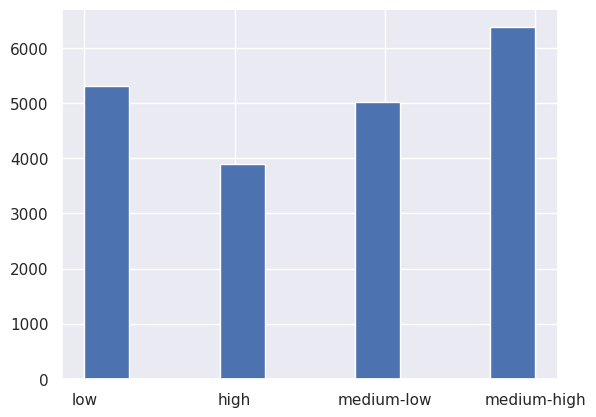

In [ ]:
pd.qcut(kickstarter_df['goal'], 10).value_counts().sort_index()
kickstarter_df['goal_class'] = pd.qcut(kickstarter_df['goal'], q=4, labels=['low', 'medium-low', 'medium-high', 'high'])
kickstarter_df['goal_class'].hist()

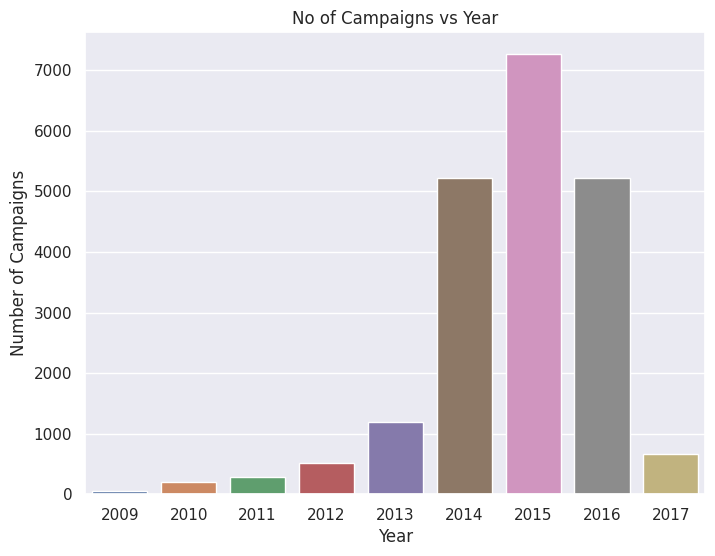

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
ax = sns.countplot(x='launched_at_yr', data=kickstarter_df)
ax.set(xlabel='Year', ylabel='Number of Campaigns', title='No of Campaigns vs Year')
plt.show()

In [ ]:
!pip install wordcloud
!pip install --upgrade Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

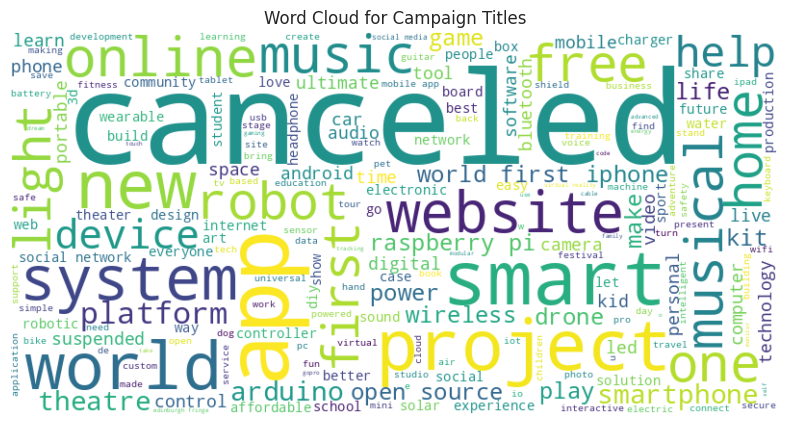

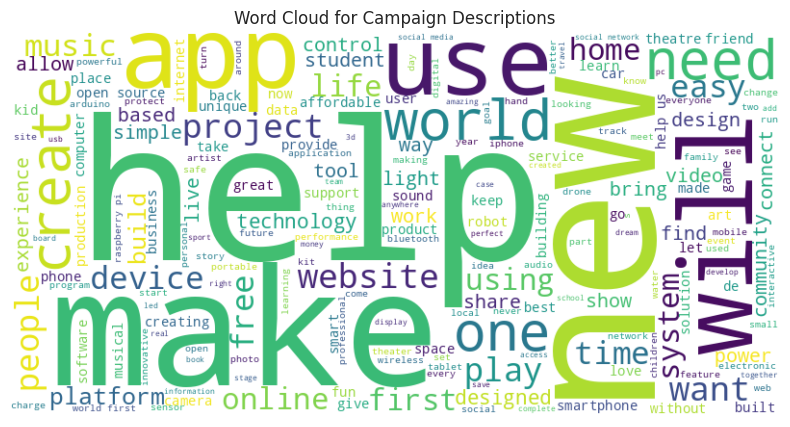

In [ ]:
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Drop rows with missing values in 'blurb' column
kickstarter_df_copy = kickstarter_df.dropna(subset=['blurb'])

# Calculate the title and description word counts for each state
kickstarter_df_copy['title_word_count'] = kickstarter_df_copy['name'].apply(lambda x: len(word_tokenize(x)))
kickstarter_df_copy['description_word_count'] = kickstarter_df_copy['blurb'].apply(lambda x: len(word_tokenize(x)))

# Create a word cloud for the 'name' column
text = " ".join(state.lower() for state in kickstarter_df_copy['name'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Campaign Titles')
plt.show()

# Create a word cloud for the 'blurb' column
text = " ".join(state.lower() for state in kickstarter_df_copy['blurb'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Campaign Descriptions')
plt.show()


In [ ]:
def extract_days(val):
    try:
        l = val.split(" ")
        return int(l[0])
    except:
        return np.nan

kickstarter_df['create_to_launch_days'] = kickstarter_df['create_to_launch'].map(extract_days)
kickstarter_df['launch_to_deadline_days'] = kickstarter_df['launch_to_deadline'].map(extract_days)
kickstarter_df['launch_to_state_change_days'] = kickstarter_df['launch_to_state_change'].map(extract_days)
kickstarter_df.head(1)

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,creator,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend,launch_month,launch_year,goal_class
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,$,True,2015-01-23 10:35:00,2015-01-23 10:35:00,2014-11-29 22:55:57,2014-12-17 13:47:36,False,0,1.0,0.0,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,11.0,9.0,21.0,16.0,Friday,Friday,Saturday,Wednesday,1,23,2015,10,1,23,2015,10,11,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0,12,2014,low


<Axes: >

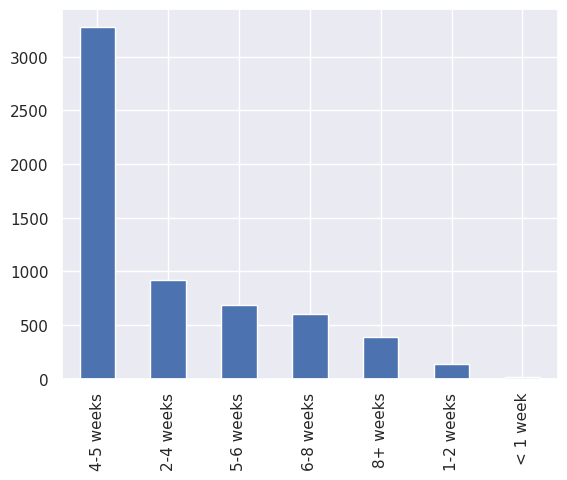

In [ ]:
def return_week_bins(val):
    if val < 7:
        return "< 1 week"
    elif val < 14:
        return "1-2 weeks"
    elif val < 28:
        return "2-4 weeks"
    elif val < 35:
        return "4-5 weeks"
    elif val < 42:
        return "5-6 weeks"
    elif val < 56:
        return "6-8 weeks"
    else:
        return "8+ weeks"

successful_state_series = kickstarter_df[kickstarter_df['state'] == "successful"]['launch_to_deadline_days']
successful_state_series.map(return_week_bins).value_counts().plot(kind='bar')

<Axes: >

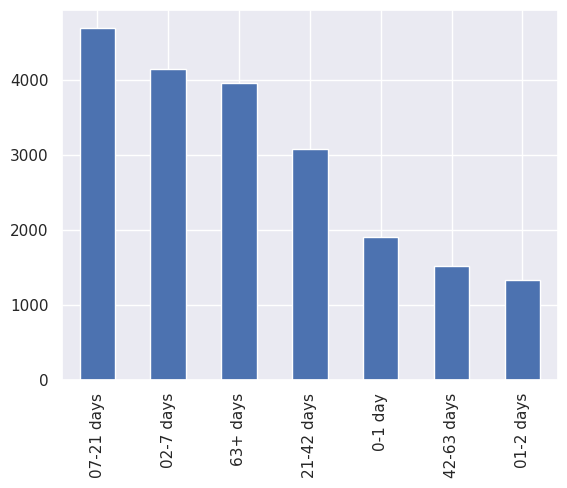

In [ ]:
def return_date_bins(val):
    if val < 1:
        return "0-1 day"
    elif val < 2:
        return "01-2 days"
    elif val < 7:
        return "02-7 days"
    elif val < 21:
        return "07-21 days"
    elif val < 42:
        return "21-42 days"
    elif val < 63:
        return "42-63 days"
    else:
        return "63+ days"

create_launch_series = kickstarter_df['create_to_launch_days']
create_launch_series.map(return_date_bins).value_counts().plot(kind='bar')

In [ ]:
kickstarter_df.head()

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,creator,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend,launch_month,launch_year,goal_class
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,$,True,2015-01-23 10:35:00,2015-01-23 10:35:00,2014-11-29 22:55:57,2014-12-17 13:47:36,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,11.0,9.0,21.0,16.0,Friday,Friday,Saturday,Wednesday,1,23,2015,10,1,23,2015,10,11,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0,12,2014,low
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,USD,$,True,2015-05-01 16:13:22,2015-05-01 16:13:24,2015-02-20 09:28:43,2015-03-02 16:13:22,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,4.0,4.0,23.0,15.0,Friday,Friday,Friday,Monday,5,1,2015,16,5,1,2015,16,2,20,2015,9,3,2,2015,16,10 days 06:44:39.000000000,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0,3,2015,low
2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,USD,$,True,2015-03-26 08:17:04,2015-03-26 08:17:05,2015-01-24 00:08:06,2015-01-25 08:17:04,False,5,1.000000,120.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""NG"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,8.0,8.0,18.0,10.0,Thursday,Thursday,Saturday,Sunday,3,26,2015,8,3,26,2015,8,1,24,2015,0,1,25,2015,8,1 days 08:08:58.000000000,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0,1,2015,high
3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,USD,$,True,2014-10-06 00:41:17,2014-10-06 00:41:17,2014-09-05 22:30:00,2014-09-06 00:41:17,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""cou

In [ ]:
kickstarter_dummy = kickstarter_df.copy()

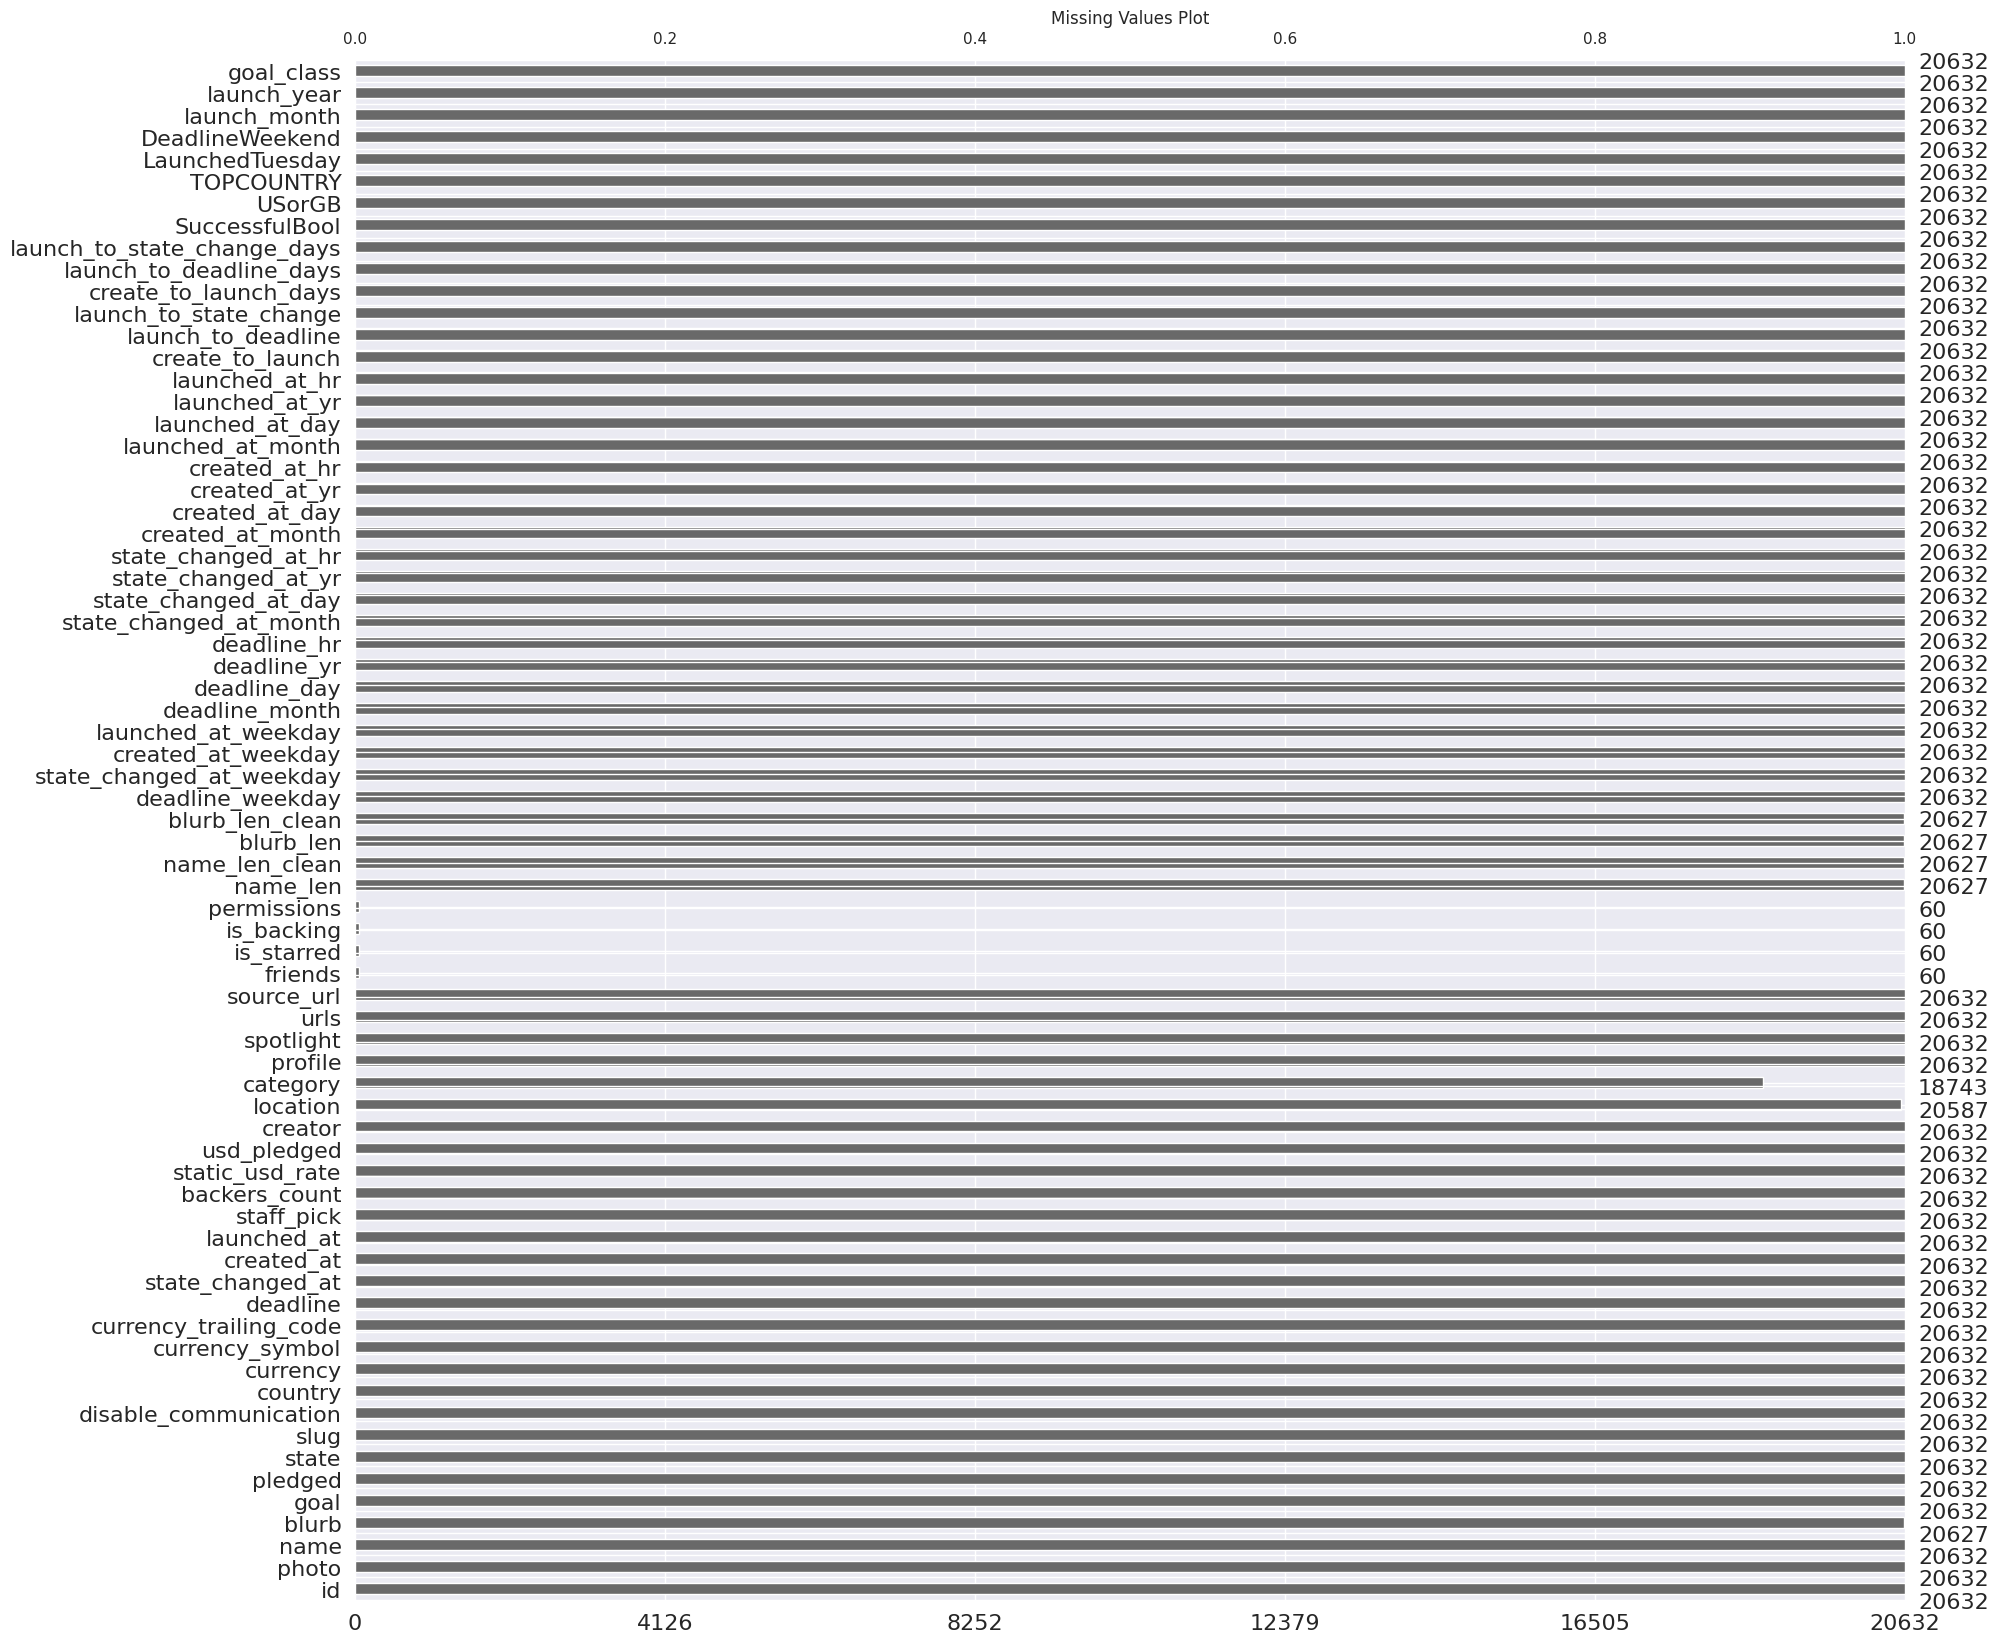

In [ ]:
import missingno as msno
msno.bar(kickstarter_dummy, figsize=(20,20))
plt.title("Missing Values Plot")
plt.show()

## Data Cleaning and Feature Engineering

In [ ]:
# Data cleaning
kickstarter_dummy.drop(['id', 'photo', 'name', 'blurb', 'pledged', 'state', 'slug', 'disable_communication', 'currency', 'currency_symbol', 'currency_trailing_code', 'urls', 'source_url', 'friends', 'is_starred', 'is_backing', 'permissions'], axis=1, inplace=True)
kickstarter_dummy.dropna(inplace=True)

In [ ]:
# Feature engineering
kickstarter_dummy['created_at'] = pd.to_datetime(kickstarter_dummy['created_at'])
kickstarter_dummy['launched_at'] = pd.to_datetime(kickstarter_dummy['launched_at'])
kickstarter_dummy['state_changed_at'] = pd.to_datetime(kickstarter_dummy['state_changed_at'])

kickstarter_dummy['create_to_launch'] = pd.to_timedelta(kickstarter_dummy['create_to_launch'])
kickstarter_dummy['create_to_launch_days'] = kickstarter_dummy['create_to_launch'].dt.total_seconds() / 86400

kickstarter_dummy['launch_to_deadline'] = pd.to_timedelta(kickstarter_dummy['launch_to_deadline'])
kickstarter_dummy['launch_to_deadline_days'] = kickstarter_dummy['launch_to_deadline'].dt.total_seconds() / 86400

kickstarter_dummy['launch_to_state_change'] = pd.to_timedelta(kickstarter_dummy['launch_to_state_change'])
kickstarter_dummy['launch_to_state_change_days'] = kickstarter_dummy['launch_to_state_change'].dt.total_seconds() / 86400

kickstarter_dummy.drop(['create_to_launch', 'launch_to_deadline', 'launch_to_state_change'], axis=1, inplace=True)

kickstarter_dummy['SuccessfulBool'] = kickstarter_dummy['state_changed_at'] >= kickstarter_dummy['deadline']
kickstarter_dummy['SuccessfulBool'] = kickstarter_dummy['SuccessfulBool'].astype(int)

kickstarter_dummy['USorGB'] = np.where(kickstarter_dummy['country'].isin(['US', 'GB']), 1, 0)

kickstarter_dummy['TOPCOUNTRY'] = np.where(kickstarter_dummy['country'].isin(['US', 'GB', 'CA', 'AU', 'DE', 'FR', 'IT', 'NL', 'ES', 'SE', 'NZ', 'DK', 'CH', 'NO', 'HK', 'SG']), 1, 0)

kickstarter_dummy['LaunchedTuesday'] = np.where(kickstarter_dummy['launched_at_weekday'] == 'Tuesday', 1, 0)
kickstarter_dummy['DeadlineWeekend'] = np.where(kickstarter_dummy['deadline_weekday'].isin(['Saturday', 'Sunday']), 1, 0)
kickstarter_dummy.head()

,goal,country,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,creator,location,category,profile,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend,launch_month,launch_year,goal_class
0,1500.0,US,2015-01-23 10:35:00,2015-01-23 10:35:00,2014-11-29 22:55:57,2014-12-17 13:47:36,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,11.0,9.0,21.0,16.0,Friday,Friday,Saturday,Wednesday,1,23,2015,10,1,23,2015,10,11,29,2014,22,12,17,2014,13,17.619201,36.866250,36.866250,1,1,1,0,0,12,2014,low
1,500.0,US,2015-05-01 16:13:22,2015-05-01 16:13:24,2015-02-20 09:28:43,2015-03-02 16:13:22,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,4.0,4.0,23.0,15.0,Friday,Friday,Friday,Monday,5,1,2015,16,5,1,2015,16,2,20,2015,9,3,2,2015,16,10.281007,60.000000,60.000023,1,1,1,0,0,3,2015,low
2,100000.0,US,2015-03-26 08:17:04,2015-03-26 08:17:05,2015-01-24 00:08:06,2015-01-25 08:17:04,False,5,1.000000,120.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""NG"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,8.0,8.0,18.0,10.0,Thursday,Thursday,Saturday,Sunday,3,26,2015,8,3,26,2015,8,1,24,2015,0,1,25,2015,8,1.339560,60.000000,60.000012,1,1,1,0,0,1,2015,high
3,5000.0,US,2014-10-06 00:41:17,2014-10-06 00:41:17,2014-09-05 22:30:00,2014-09-06 00:41:17,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,7.0,6.0,21.0,13.0,Monday,Monday,Friday,Saturday,10,6,2014,0,10,6,2014,0,9,5,2014,22,9,6,2014,0,0.091169,30.000000,30.000000,1,1,1,0,0,9,2014,medium-low
4,3222.0,DE,2016-06-27 12:00:00,2016-06-27 12:00:00,2016-05-25 14:09:49,2016-05-26 05:57:27,False,17,1.114613,396.802395,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""DE"",""urls"":{""web"":{""discover"":""htt...",Academic,"{""background_image_opacity"":0.8,""should_show_f...",False,7.0,7.0,18.0,18.0,Monday,Monday,Wednesday,Thursday,6,27,2016,12,6,27,2016,12,5,25,2016,14,5,26,2016,5,0.658079,32.251771,32.251771,1,0,1,0,0,5,2016,low


In [ ]:
kickstarter_dummy.category.value_counts()

Web             3324
Hardware        3237
Software        2599
Gadgets         2336
Plays           1184
Apps            1168
Wearables        971
Musical          791
Sound            527
Festivals        482
Robots           473
Flight           373
Experimental     321
Immersive        277
Makerspaces      203
Spaces           181
Places           100
Shorts            39
Thrillers         20
Webseries         20
Restaurants       20
Blues             20
Academic          20
Comedy            10
Name: category, dtype: int64

In [ ]:
drop_cols = ['deadline',	'state_changed_at',	'created_at',	'launched_at', 'creator',	'location',	'profile'	]
# Preprocessing
kickstarter_dummy.drop(columns = drop_cols,inplace=True)
kickstarter_dummy = pd.get_dummies(kickstarter_dummy, columns=['deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'category','goal_class'])

In [ ]:
kickstarter_dummy.drop(columns=[ 'country','state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr'], axis=1, inplace=True)

In [ ]:
kickstarter_dummy.head()

,goal,staff_pick,backers_count,static_usd_rate,usd_pledged,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,deadline_day,deadline_yr,deadline_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend,launch_month,launch_year,deadline_weekday_Friday,deadline_weekday_Monday,deadline_weekday_Saturday,deadline_weekday_Sunday,deadline_weekday_Thursday,deadline_weekday_Tuesday,deadline_weekday_Wednesday,state_changed_at_weekday_Friday,state_changed_at_weekday_Monday,state_changed_at_weekday_Saturday,state_changed_at_weekday_Sunday,state_changed_at_weekday_Thursday,state_changed_at_weekday_Tuesday,state_changed_at_weekday_Wednesday,created_at_weekday_Friday,created_at_weekday_Monday,created_at_weekday_Saturday,created_at_weekday_Sunday,created_at_weekday_Thursday,created_at_weekday_Tuesday,created_at_weekday_Wednesday,launched_at_weekday_Friday,launched_at_weekday_Monday,launched_at_weekday_Saturday,launched_at_weekday_Sunday,launched_at_weekday_Thursday,launched_at_weekday_Tuesday,launched_at_weekday_Wednesday,category_Academic,category_Apps,category_Blues,category_Comedy,category_Experimental,category_Festivals,category_Flight,category_Gadgets,category_Hardware,category_Immersive,category_Makerspaces,category_Musical,category_Places,category_Plays,category_Restaurants,category_Robots,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries,goal_class_low,goal_class_medium-low,goal_class_medium-high,goal_class_high
0,1500.0,False,0,1.000000,0.000000,False,11.0,9.0,21.0,16.0,1,23,2015,10,17.619201,36.866250,36.866250,1,1,1,0,0,12,2014,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,500.0,False,0,1.000000,0.000000,False,4.0,4.0,23.0,15.0,5,1,2015,16,10.281007,60.000000,60.000023,1,1,1,0,0,3,2015,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,100000.0,False,5,1.000000,120.000000,False,8.0,8.0,18.0,10.0,3,26,2015,8,1.339560,60.000000,60.000012,1,1,1,0,0,1,2015,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,5000.0,False,0,1.000000,0.000000,False,7.0,6.0,21.0,13.0,10,6,2014,0,0.091169,30.000000,30.000000,1,1,1,0,0,9,2014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3222.0,False,17,1.114613,396.802395,False,7.0,7.0,18.0,18.0,6,27,2016,12,0.658079,32.251771,32.251771,1,0,1,0,0,5,2016,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
kickstarter_dummy.shape

(18696, 80)

# Modelling



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Select the features we want to use for prediction
# features = ['goal', 'disable_communication', 'backers_count', 'USorGB', 'LaunchedTuesday', 'DeadlineWeekend']
# cat_features = ['country','']
# Split the data into training and testing sets
X = kickstarter_dummy.drop(['SuccessfulBool'], axis=1)
y = kickstarter_dummy['SuccessfulBool']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an empty dictionary to store the scores
initial_scores = {}
scores_with_rfe = {}


## Logistic Regression


In [ ]:
# Create a logistic regression model
lr_model = LogisticRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
initial_scores['LR'] = {
    'Accuracy': accuracy_score(y_test, lr_y_pred),
    'Precision': precision_score(y_test, lr_y_pred),
    'Recall': recall_score(y_test, lr_y_pred),
    'F1-Score': f1_score(y_test, lr_y_pred)
}

# Print the initial scores for Logistic Regression
print("Initial scores for Logistic Regression:")
for metric, score in initial_scores['LR'].items():
    print(f"{metric}: {score}")

Initial scores for Logistic Regression:
Accuracy: 0.8494652406417113
Precision: 0.8494652406417113
Recall: 1.0
F1-Score: 0.918606332224953


## XGBoost Algorithm

In [ ]:
# Create the XGBoost model
xgb_model = XGBClassifier()

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
initial_scores['XGB'] = {
    'Accuracy': accuracy_score(y_test, xgb_y_pred),
    'Precision': precision_score(y_test, xgb_y_pred),
    'Recall': recall_score(y_test, xgb_y_pred),
    'F1-Score': f1_score(y_test, xgb_y_pred)
}

# Print the initial scores for XGBoost
print("Initial scores for XGBoost:")
for metric, score in initial_scores['XGB'].items():
    print(f"{metric}: {score}")


Initial scores for XGBoost:
Accuracy: 0.9925133689839573
Precision: 0.9915704027474243
Recall: 0.9996852376455776
F1-Score: 0.9956112852664576


## SVC

In [ ]:
# Create a SVC model
svc_model = SVC(probability=True)

# Train the model on the training set
svc_model.fit(X_train, y_train)

# Make predictions on the test set
svc_y_pred = svc_model.predict(X_test)

# Calculate evaluation metrics
initial_scores['SVC'] = {
    'Accuracy': accuracy_score(y_test, svc_y_pred),
    'Precision': precision_score(y_test, svc_y_pred),
    'Recall': recall_score(y_test, svc_y_pred),
    'F1-Score': f1_score(y_test, svc_y_pred)
}

# Print the initial scores for SVC
print("Initial scores for SVC:")
for metric, score in initial_scores['SVC'].items():
    print(f"{metric}: {score}")


Initial scores for SVC:
Accuracy: 0.8497326203208556
Precision: 0.8496924311313185
Recall: 1.0
F1-Score: 0.9187391555812608


## Random Forest

In [ ]:
# Create a Random Forest model
rf_model = RandomForestClassifier()

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
initial_scores['RF'] = {
    'Accuracy': accuracy_score(y_test, rf_y_pred),
    'Precision': precision_score(y_test, rf_y_pred),
    'Recall': recall_score(y_test, rf_y_pred),
    'F1-Score': f1_score(y_test, rf_y_pred)
}

# Print the initial scores for Random Forest
print("Initial scores for Random Forest:")
for metric, score in initial_scores['RF'].items():
    print(f"{metric}: {score}")


Initial scores for Random Forest:
Accuracy: 0.9748663101604278
Precision: 0.9721286370597243
Recall: 0.9990557129367328
F1-Score: 0.9854082583048742


## Decision Tree

In [ ]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
initial_scores['DT'] = {
    'Accuracy': accuracy_score(y_test, dt_y_pred),
    'Precision': precision_score(y_test, dt_y_pred),
    'Recall': recall_score(y_test, dt_y_pred),
    'F1-Score': f1_score(y_test, dt_y_pred)
}

# Print the initial scores for Decision Tree
print("Initial scores for Decision Tree:")
for metric, score in initial_scores['DT'].items():
    print(f"{metric}: {score}")


Initial scores for Decision Tree:
Accuracy: 0.9852941176470589
Precision: 0.9902638190954773
Recall: 0.9924457034938622
F1-Score: 0.9913535607608867


## KNN

In [ ]:
# Create the model
knn_model = KNeighborsClassifier()

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics
initial_scores['KNN'] = {
    'Accuracy': accuracy_score(y_test, knn_y_pred),
    'Precision': precision_score(y_test, knn_y_pred),
    'Recall': recall_score(y_test, knn_y_pred),
    'F1-Score': f1_score(y_test, knn_y_pred)
}

# Print the initial scores for KNN
print("Initial scores for KNN:")
for metric, score in initial_scores['KNN'].items():
    print(f"{metric}: {score}")


Initial scores for KNN:
Accuracy: 0.8604278074866311
Precision: 0.8813559322033898
Recall: 0.9656909033679572
F1-Score: 0.921598077500751


# Modelling with Feature Extraction Using RFE

## RFE Feature Extraction

In [ ]:
# Use logistic regression with RFE to select the top 10 features
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20, step=1)
rfe.fit(X, y)

# # Print the ranking of the features
# print(rfe.ranking_)

# Get the top 10 features
top_features = X.columns[rfe.support_]
print(top_features)

# Get selected feature indices
feature_indices = rfe.get_support(indices=True)

# Subset X_train and X_test with selected features
X_train_rfe = X_train.iloc[:, feature_indices]
X_test_rfe = X_test.iloc[:, feature_indices]

Index(['static_usd_rate', 'spotlight', 'name_len_clean', 'launch_to_deadline_days', 'launch_to_state_change_days', 'USorGB', 'deadline_weekday_Saturday', 'deadline_weekday_Sunday', 'deadline_weekday_Wednesday', 'state_changed_at_weekday_Saturday', 'state_changed_at_weekday_Sunday', 'created_at_weekday_Thursday', 'launched_at_weekday_Friday', 'launched_at_weekday_Monday', 'launched_at_weekday_Wednesday', 'category_Software', 'category_Web', 'goal_class_low', 'goal_class_medium-low', 'goal_class_medium-high'], dtype='object')


## Logistic Regression After Feature Extraction Using RFE


In [ ]:
# Create a logistic regression model
lr_model = LogisticRegression()

# Train the model on the training set
lr_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test_rfe)

# Calculate evaluation metrics
scores_with_rfe['LR'] = {
    'Accuracy': accuracy_score(y_test, lr_y_pred),
    'Precision': precision_score(y_test, lr_y_pred),
    'Recall': recall_score(y_test, lr_y_pred),
    'F1-Score': f1_score(y_test, lr_y_pred)
}

# Print the initial scores for Logistic Regression
print("Post RFE scores for Logistic Regression:")
for metric, score in scores_with_rfe['LR'].items():
    print(f"{metric}: {score}")

Post RFE scores for Logistic Regression:
Accuracy: 0.9943850267379679
Precision: 0.9934333958724203
Recall: 1.0
F1-Score: 0.9967058823529412


## XGBoost Algorithm After Feature Extraction Using RFE

In [ ]:
# Create the XGBoost model
xgb_model = XGBClassifier()

# Train the model on the training set
xgb_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test_rfe)

# Calculate evaluation metrics
scores_with_rfe['XGB'] = {
    'Accuracy': accuracy_score(y_test, xgb_y_pred),
    'Precision': precision_score(y_test, xgb_y_pred),
    'Recall': recall_score(y_test, xgb_y_pred),
    'F1-Score': f1_score(y_test, xgb_y_pred)
}

# Print the initial scores for XGBoost
print("Post RFE scores for XGBoost:")
for metric, score in scores_with_rfe['XGB'].items():
    print(f"{metric}: {score}")


Post RFE scores for XGBoost:
Accuracy: 0.993048128342246
Precision: 0.9924976555173491
Recall: 0.9993704752911552
F1-Score: 0.995922208281054


## SVC After Feature Extraction Using RFE

In [ ]:
# Create a SVC model
svc_model = SVC(probability=True)

# Train the model on the training set
svc_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
svc_y_pred = svc_model.predict(X_test_rfe)

# Calculate evaluation metrics
scores_with_rfe['SVC'] = {
    'Accuracy': accuracy_score(y_test, svc_y_pred),
    'Precision': precision_score(y_test, svc_y_pred),
    'Recall': recall_score(y_test, svc_y_pred),
    'F1-Score': f1_score(y_test, svc_y_pred)
}

# Print the initial scores for SVC
print("Post RFE scores for SVC:")
for metric, score in scores_with_rfe['SVC'].items():
    print(f"{metric}: {score}")


Post RFE scores for SVC:
Accuracy: 0.9834224598930481
Precision: 0.9808582895955542
Recall: 1.0
F1-Score: 0.9903366583541148


## Random Forest After Feature Extraction Using RFE

In [ ]:
# Create a Random Forest model
rf_model = RandomForestClassifier()

# Train the model on the training set
rf_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test_rfe)

# Calculate evaluation metrics
scores_with_rfe['RF'] = {
    'Accuracy': accuracy_score(y_test, rf_y_pred),
    'Precision': precision_score(y_test, rf_y_pred),
    'Recall': recall_score(y_test, rf_y_pred),
    'F1-Score': f1_score(y_test, rf_y_pred)
}

# Print the initial scores for Random Forest
print("Post RFE scores for Random Forest:")
for metric, score in scores_with_rfe['RF'].items():
    print(f"{metric}: {score}")


Post RFE scores for Random Forest:
Accuracy: 0.9850267379679144
Precision: 0.9835760768515649
Recall: 0.9990557129367328
F1-Score: 0.9912554653341661


## Decision Tree After Feature Extraction Using RFE

In [ ]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model on the training set
dt_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test_rfe)

# Calculate evaluation metrics
scores_with_rfe['DT'] = {
    'Accuracy': accuracy_score(y_test, dt_y_pred),
    'Precision': precision_score(y_test, dt_y_pred),
    'Recall': recall_score(y_test, dt_y_pred),
    'F1-Score': f1_score(y_test, dt_y_pred)
}

# Print the initial scores for Decision Tree
print("Post RFE scores for Decision Tree:")
for metric, score in scores_with_rfe['DT'].items():
    print(f"{metric}: {score}")


Post RFE scores for Decision Tree:
Accuracy: 0.9890374331550802
Precision: 0.9921531701192718
Recall: 0.9949638023292414
F1-Score: 0.9935564985069936


## KNN After Feature Extraction Using RFE

In [ ]:
# Create the model
knn_model = KNeighborsClassifier()

# Train the model on the training set
knn_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test_rfe)

# Calculate evaluation metrics
scores_with_rfe['KNN'] = {
    'Accuracy': accuracy_score(y_test, knn_y_pred),
    'Precision': precision_score(y_test, knn_y_pred),
    'Recall': recall_score(y_test, knn_y_pred),
    'F1-Score': f1_score(y_test, knn_y_pred)
}

# Print the initial scores for KNN
print("Post RFE scores for KNN:")
for metric, score in scores_with_rfe['KNN'].items():
    print(f"{metric}: {score}")


Post RFE scores for KNN:
Accuracy: 0.9850267379679144
Precision: 0.9826786266625426
Recall: 1.0
F1-Score: 0.9912636505460218


## Performance Comparison Plots

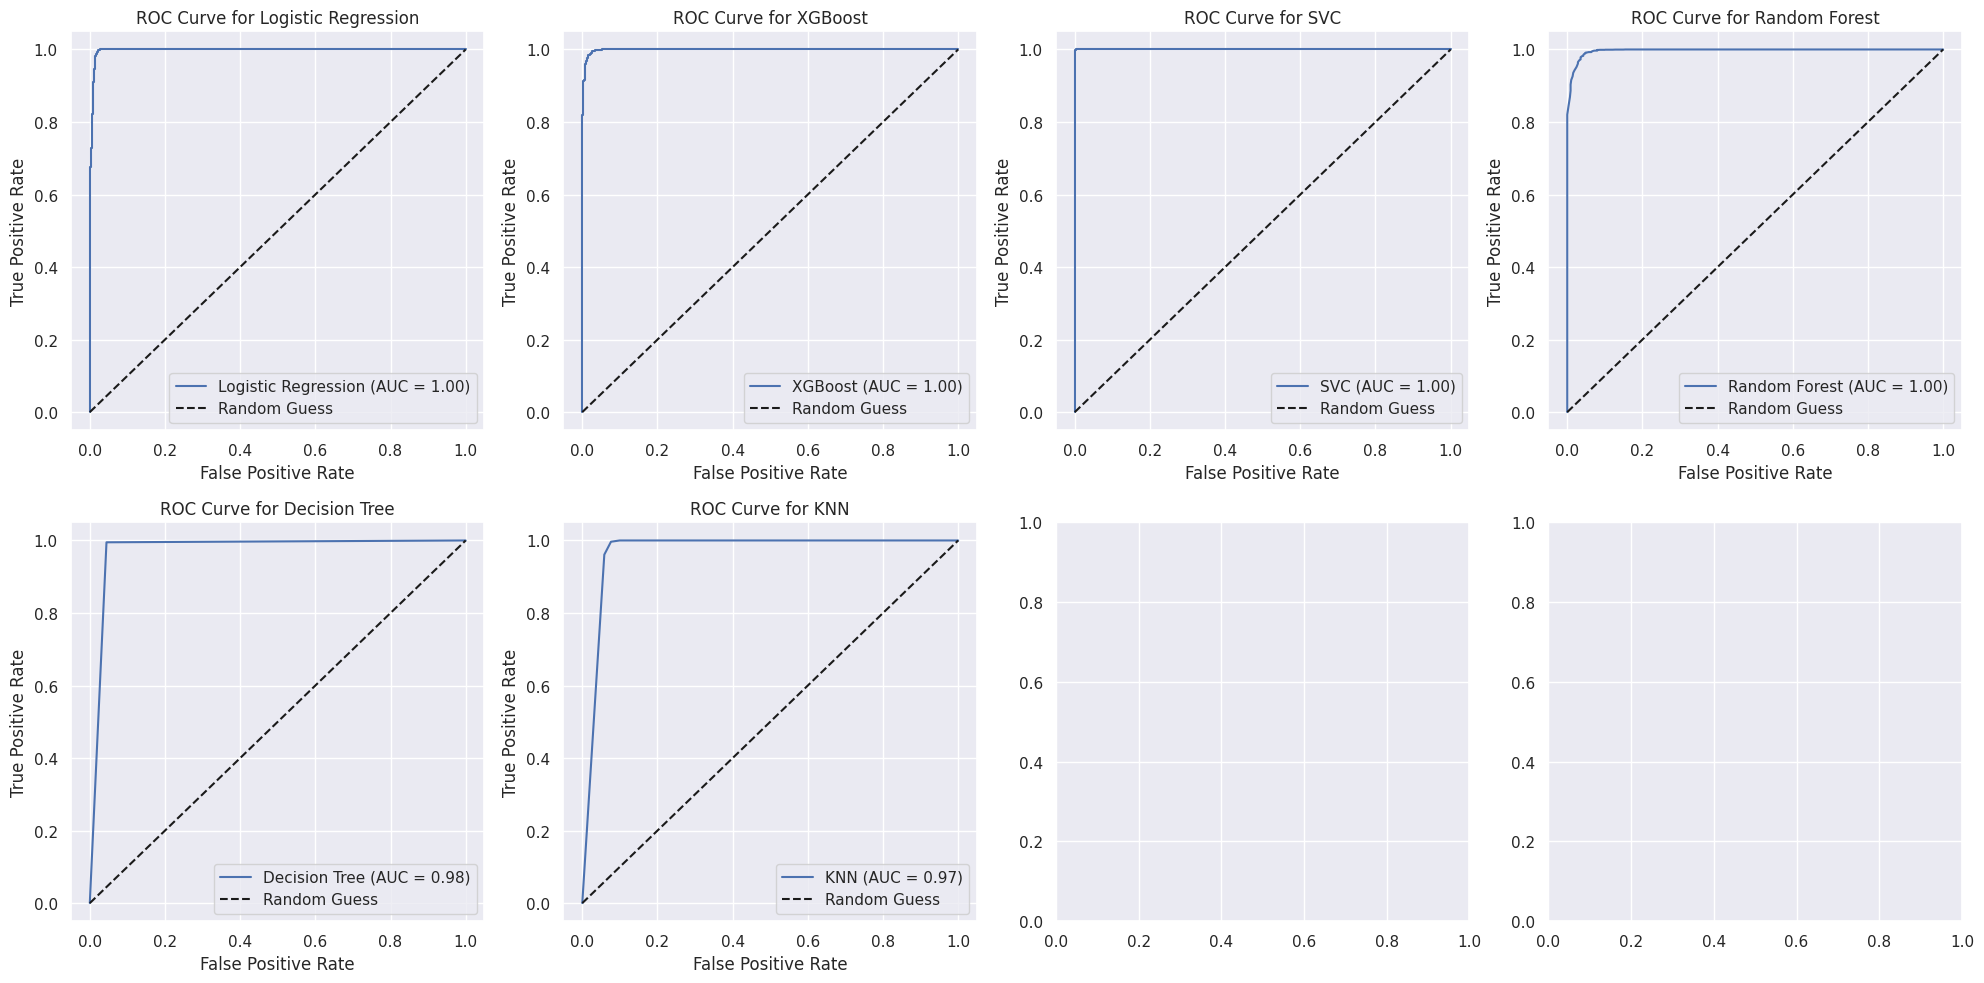

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

models = [('Logistic Regression', lr_model), ('XGBoost', xgb_model), ('SVC', svc_model),
          ('Random Forest', rf_model), ('Decision Tree', dt_model),          
          ('KNN', knn_model)]

fig, axs = plt.subplots(2, 4, figsize=(20,10))

for i, (name, model) in enumerate(models):
    y_pred_proba = model.predict_proba(X_test_rfe)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    row = i // 4
    col = i % 4
    axs[row, col].plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    axs[row, col].plot([0, 1], [0, 1], 'k--', label='Random Guess')
    axs[row, col].set_xlabel('False Positive Rate')
    axs[row, col].set_ylabel('True Positive Rate')
    axs[row, col].set_title(f'ROC Curve for {name}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

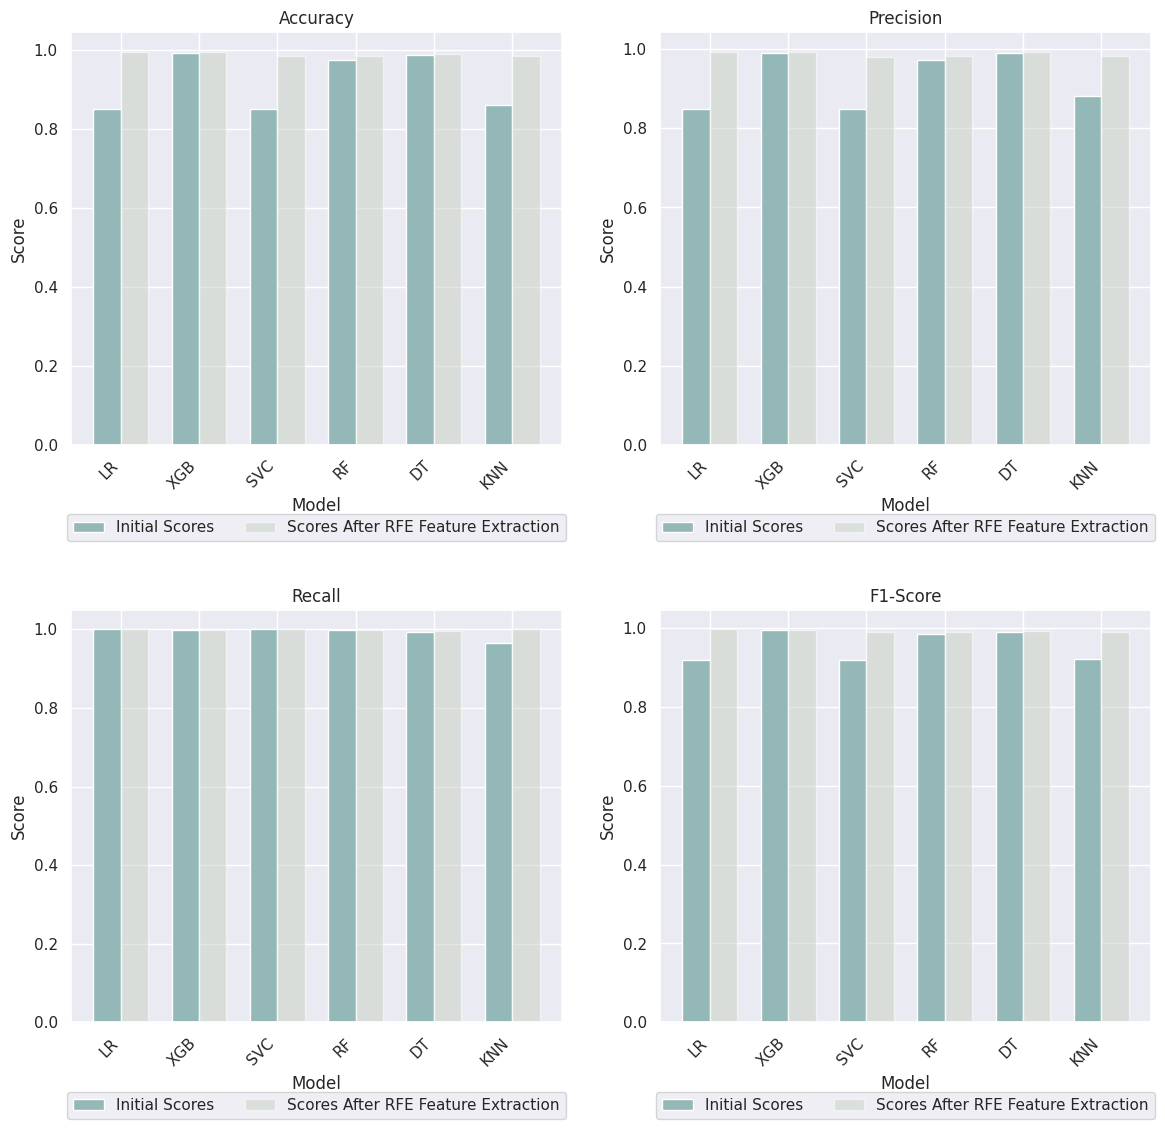

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the list of models from the initial_scores dictionary
models_list = list(initial_scores.keys())

# Create subplots for each evaluation metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 11))
axes = axes.flatten()

# Loop over each metric and plot the change in score for each model
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
    ax = axes[i]
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    
    # Set the x-positions of the bars
    initial_pos = np.arange(len(models_list))
    rfe_pos = initial_pos + 0.35
    
    # Plot the initial scores for each model
    ax.bar(initial_pos, [initial_scores[model][metric] for model in models_list], width=0.35, color='#94b8b8', label='Initial Scores')
    
    # Plot the scores after RFE feature extraction for each model
    ax.bar(rfe_pos, [scores_with_rfe[model][metric] for model in models_list], width=0.35, color='#c7d1c4', alpha=0.5, label='Scores After RFE Feature Extraction')
    
    # Set the x-axis ticks and labels
    ax.set_xticks(np.arange(len(models_list))+0.175)
    ax.set_xticklabels(models_list, rotation=45, ha='right')
    
    # Add a legend to the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.2, hspace=0.4)
plt.show()


# Modelling Using Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import time

models = {
    'LR': LogisticRegression(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    # 'SVC': SVC(),
    'XGB': XGBClassifier(),
    # 'Gradient Boost': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    # 'Naive Bayes': GaussianNB()
}

params = {
    'LR': {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.1, 1, 10]},
    'DT': {'max_depth': [3, 5, 10, None], 'min_samples_leaf': [1, 5, 10]},
    'RF': {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200]},
    # 'SVC': {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf']},
    'XGB': {'max_depth': [3, 5, 10], 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 500]},
    # 'Gradient Boost': {'max_depth': [3, 5, 10], 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 500]},
    'KNN': {'n_neighbors': [5, 10, 15]},
    # 'Naive Bayes': {}
}

# Perform grid search and cross-validation for each model
best_models = {}
cv_scores_dict = {}
time_dict = {}
for model_name, model in models.items():
    print(f'Performing grid search and cross-validation for {model_name}...')
    start_time = time.time()
    clf = GridSearchCV(model, params[model_name], cv=5)
    clf.fit(X, y)
    best_models[model_name] = clf.best_estimator_
    scores = cross_val_score(best_models[model_name], X, y, cv=5)
    cv_scores_dict[model_name] = scores
    end_time = time.time()
    time_dict[model_name] = end_time - start_time
    print(f'Time taken for {model_name}: {time_dict[model_name]} seconds')
    print(f'Best hyperparameters for {model_name}: {clf.best_params_}')
    print(f'Cross-validation scores for {model_name}: {scores}')
    print(f'Mean cross-validation score for {model_name}: {scores.mean()}')

# Compare the best models and pick the one with the highest cross-validation score
best_model_name = max(best_models, key=lambda x: cross_val_score(best_models[x], X, y, cv=5).mean())
best_model = best_models[best_model_name]
cv_scores_dict[best_model_name] = cross_val_score(best_model, X, y, cv=5)
print(f'The best model is {best_model_name} with a cross-validation score of {cv_scores_dict[best_model_name].mean()}')


Performing grid search and cross-validation for LR...
Time taken for LR: 7.061118841171265 seconds
Best hyperparameters for LR: {'C': 1, 'penalty': 'l2'}
Cross-validation scores for LR: [0.84251337 0.8422038  0.92645092 0.84247125 0.9315325 ]
Mean cross-validation score for LR: 0.8770343667628252
Performing grid search and cross-validation for DT...
Time taken for DT: 9.422143936157227 seconds
Best hyperparameters for DT: {'max_depth': None, 'min_samples_leaf': 10}
Cross-validation scores for DT: [0.99064171 0.99197646 0.94196309 0.98823215 0.98555764]
Mean cross-validation score for DT: 0.9796742101251013
Performing grid search and cross-validation for RF...
Time taken for RF: 200.0740303993225 seconds
Best hyperparameters for RF: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200}
Cross-validation scores for RF: [0.94144385 0.92404386 0.91307836 0.91815994 0.93527681]
Mean cross-validation score for RF: 0.926400564650962
Performing grid search and cross-validation for XGB..

In [ ]:
# print(cv_scores_dict)
print("Accuracy results after performing cross validation:")
for model, accuracy in cv_scores_dict.items():
    print(model + ": " + str(max(accuracy)))

Accuracy results after performing cross validation:
LR: 0.9315324953196041
DT: 0.9919764642952661
RF: 0.9414438502673796
XGB: 0.9949197860962566
KNN: 0.8705882352941177


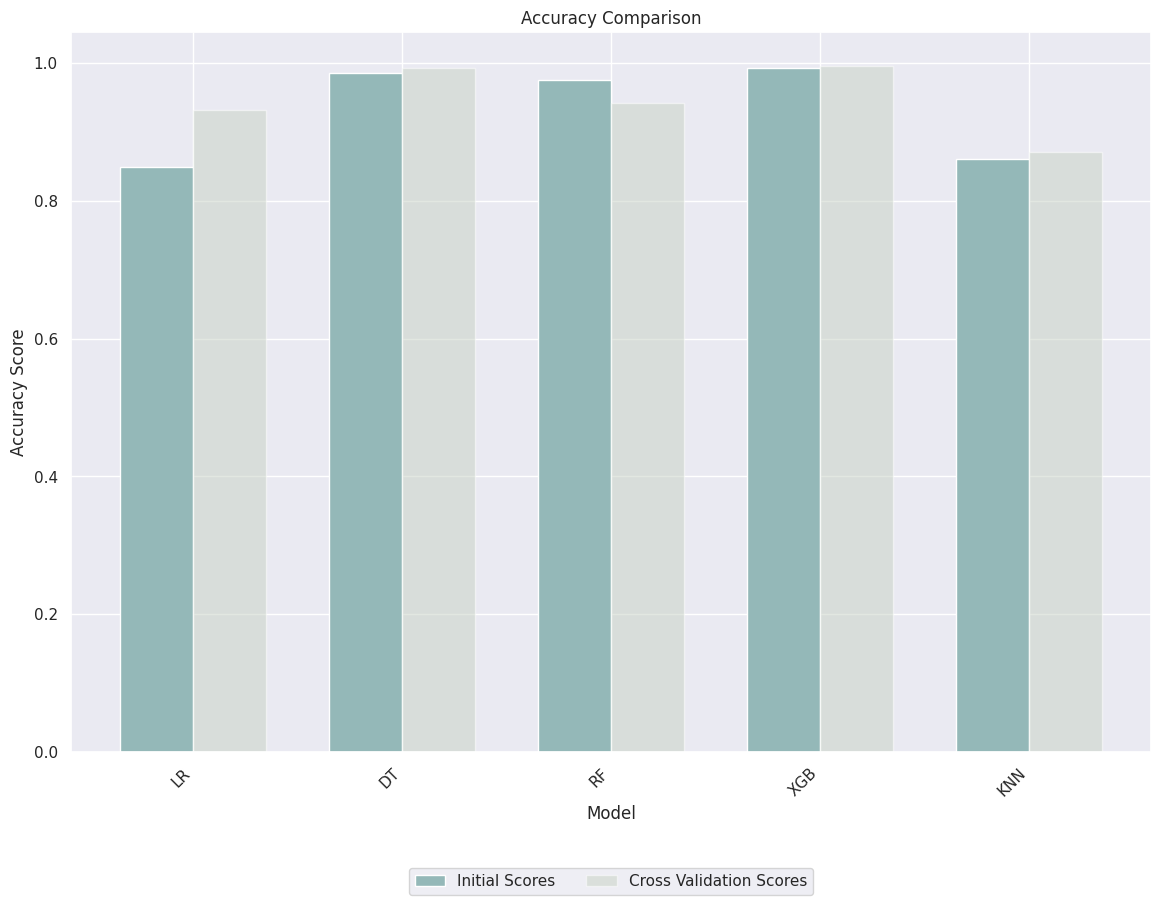

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the list of models from the initial_scores dictionary
models_list = list(initial_scores.keys())
models_list = ['LR', 'DT', 'RF', 'XGB', 'KNN']
# Create subplots for each evaluation metric
fig, ax = plt.subplots(figsize=(12, 8))

# Set the title and axis labels
ax.set_title('Accuracy Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Score')

# Set the x-positions of the bars
initial_pos = np.arange(len(models_list))
cv_pos = initial_pos + 0.35

# Plot the initial scores for each model
ax.bar(initial_pos, [initial_scores[model]['Accuracy'] for model in models_list], width=0.35, color='#94b8b8', label='Initial Scores')

# Plot the cross validation scores for each model
ax.bar(cv_pos, [max(cv_scores_dict[model]) for model in models_list], width=0.35, color='#c7d1c4', alpha=0.5, label='Cross Validation Scores')

# Set the x-axis ticks and labels
ax.set_xticks(np.arange(len(models_list))+0.175)
ax.set_xticklabels(models_list, rotation=45, ha='right')

# Add a legend to the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.2, hspace=0.4)
plt.show()


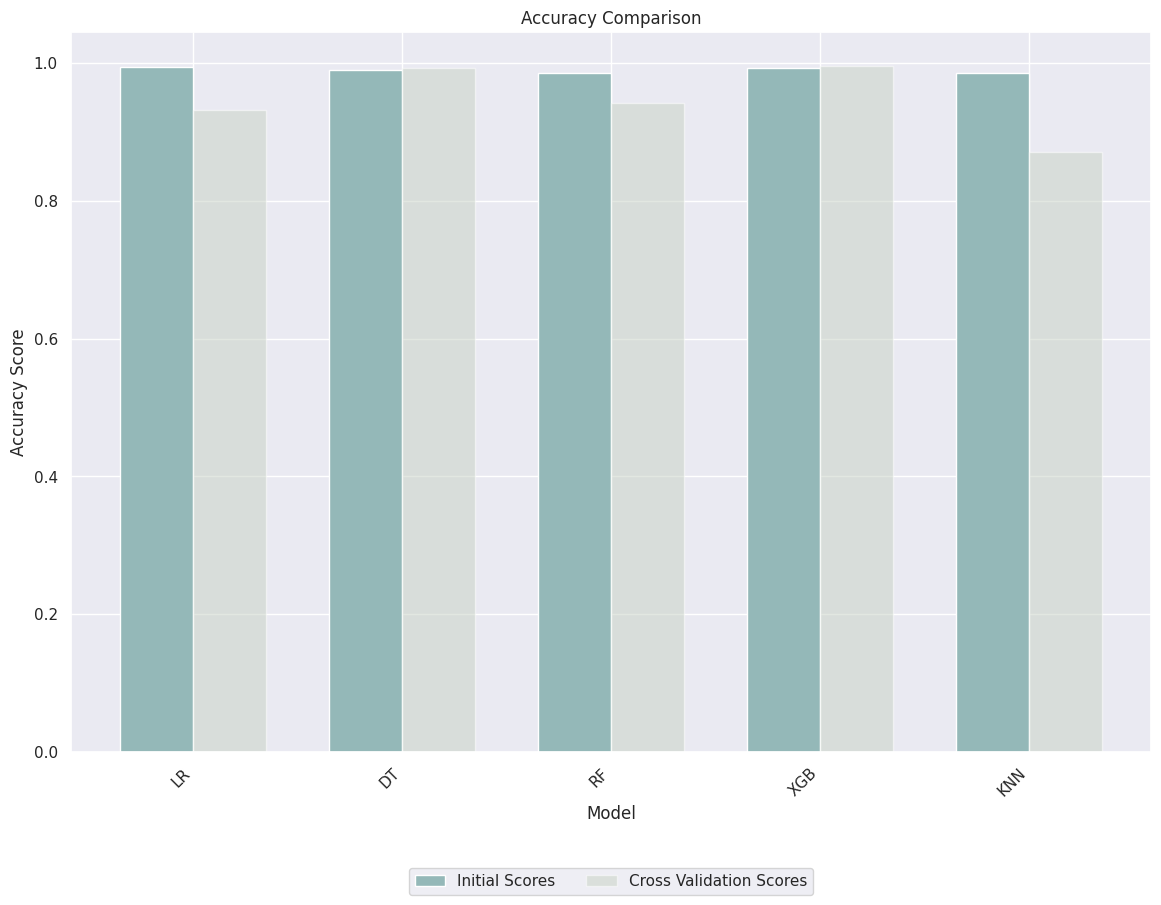

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the list of models from the initial_scores dictionary
models_list = list(initial_scores.keys())
models_list = ['LR', 'DT', 'RF', 'XGB', 'KNN']
# Create subplots for each evaluation metric
fig, ax = plt.subplots(figsize=(12, 8))

# Set the title and axis labels
ax.set_title('Accuracy Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Score')

# Set the x-positions of the bars
initial_pos = np.arange(len(models_list))
cv_pos = initial_pos + 0.35

# Plot the initial scores for each model
ax.bar(initial_pos, [scores_with_rfe[model]['Accuracy'] for model in models_list], width=0.35, color='#94b8b8', label='Initial Scores')

# Plot the cross validation scores for each model
ax.bar(cv_pos, [max(cv_scores_dict[model]) for model in models_list], width=0.35, color='#c7d1c4', alpha=0.5, label='Cross Validation Scores')

# Set the x-axis ticks and labels
ax.set_xticks(np.arange(len(models_list))+0.175)
ax.set_xticklabels(models_list, rotation=45, ha='right')

# Add a legend to the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.2, hspace=0.4)
plt.show()


In [ ]:
import matplotlib.pyplot as plt


# convert seconds to minutes
time_dict = {k: v/60 for k, v in time_dict.items()}
print(time_dict)
plt.bar(time_dict.keys(), time_dict.values())
plt.xticks(range(len(time_dict)), ['LR', 'DT', 'RF', 'XGB', 'KNN'])
plt.xlabel('Model')
plt.ylabel('Time (minutes)')
plt.title('Model training time')
plt.show()

## Performance comparison plots

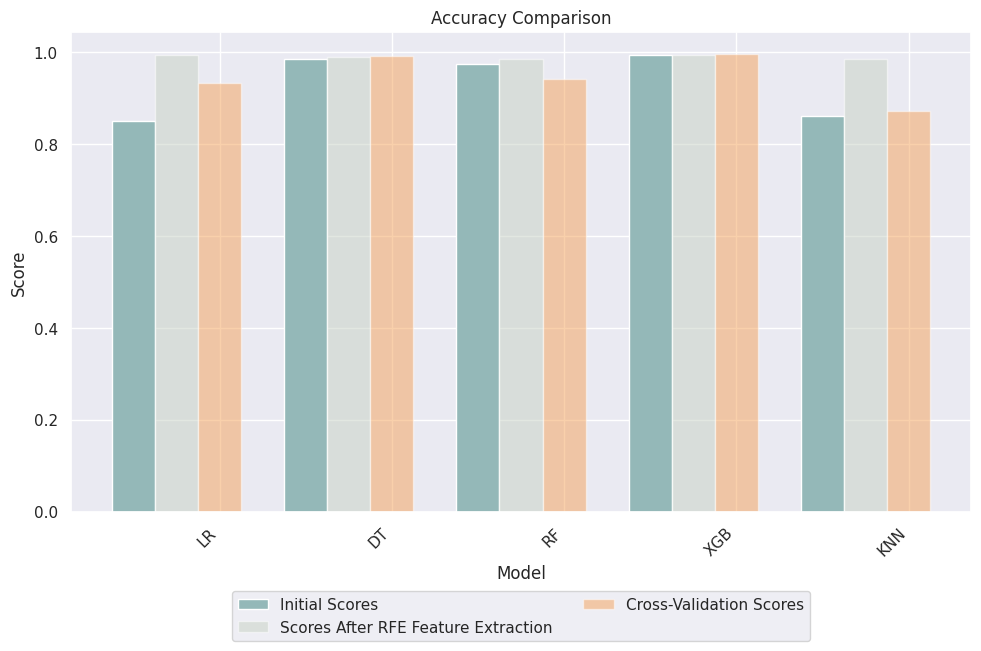

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the list of models from the initial_scores dictionary
models_list = ['LR', 'DT', 'RF', 'XGB', 'KNN']

# Create subplots for accuracy
fig, ax = plt.subplots(figsize=(10, 6))

# Set the title and labels
ax.set_title('Accuracy Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Score')

# Set the x-positions of the bars
initial_pos = np.arange(len(models_list))
rfe_pos = initial_pos + 0.25
cv_pos = initial_pos + 0.5

# Set the width of the bars
bar_width = 0.25

# Plot the initial scores for each model
ax.bar(initial_pos, [initial_scores[model]['Accuracy'] for model in models_list], width=bar_width, color='#94b8b8', label='Initial Scores')

# Plot the scores after RFE feature extraction for each model
ax.bar(rfe_pos, [scores_with_rfe[model]['Accuracy'] for model in models_list], width=bar_width, color='#c7d1c4', alpha=0.5, label='Scores After RFE Feature Extraction')

# Plot the cross-validation scores for each model
cv_scores = [np.max(cv_scores_dict[model_name]) for model_name in models_list]
ax.bar(cv_pos, cv_scores, width=bar_width, color='#f4a259', alpha=0.5, label='Cross-Validation Scores')

# Set the x-axis ticks and labels
ax.set_xticks(cv_pos)
ax.set_xticklabels(models_list, rotation=45, ha='right')

# Add a legend to the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.95, wspace=0.2, hspace=0.4)
plt.show()


## SHAP Plots

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.7 MB/s eta 0:00:00


In [ ]:
# Instantiate SHAP explainer
explainer = shap.Explainer(best_model)

In [ ]:
shap_values = explainer.shap_values(X_test)

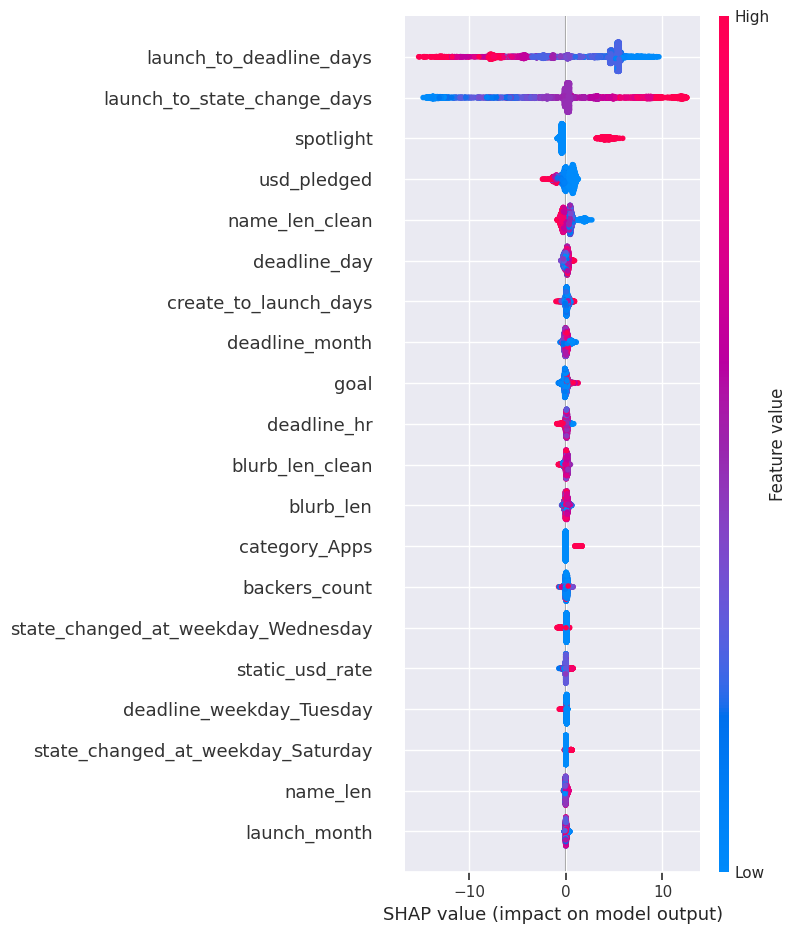

In [ ]:
# Create SHAP summary plot
shap.summary_plot(explainer(X_test), X_test)

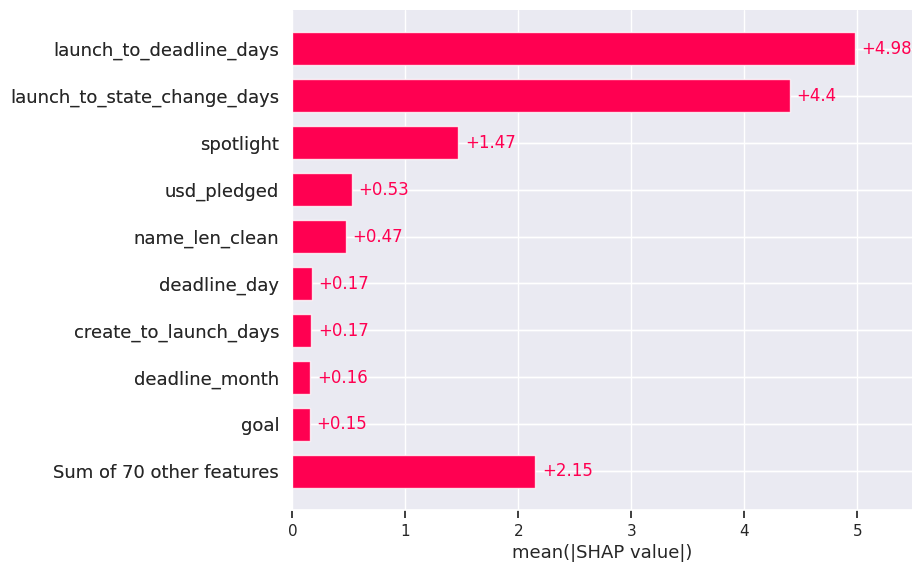

In [ ]:
# Create SHAP positive/negative impact plot
shap.plots.bar(explainer(X_test))

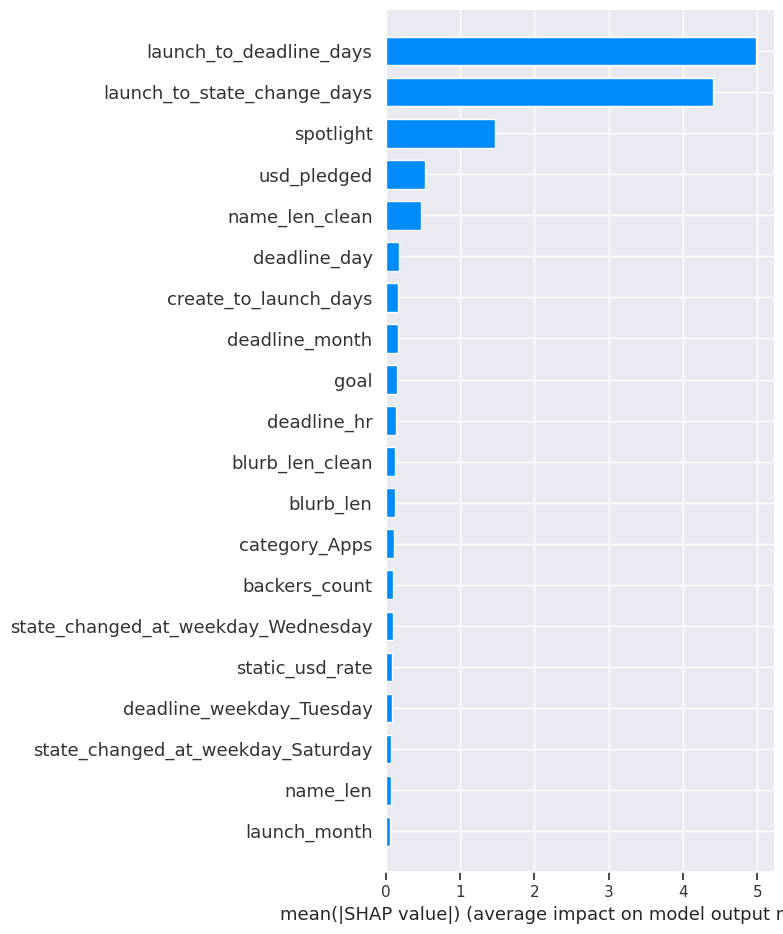

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])